## Problem Statement:

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## DATASET INFORMATION:

1. 'application_data.csv': contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

2. 'previous_application.csv': contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

## Importing the Libraries: 

In [1]:
#import important and necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows",None) #this helps in showing all rows while analysis
pd.set_option("display.max_columns",None) #this helps in showing all columns while analysis

In [2]:
#importing warnings to ignore the warning
import warnings 
warnings.filterwarnings('ignore')

## 1. Importing the Application Data(application_data.csv) as df_app

##### Here we would upload the dataset and assigning an alias(df_app) for the same

In [3]:
#importing the datasets
df_app=pd.read_csv('application_data.csv')
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Importing the Previous Application Data(previous_application.csv) as df_pre

###### Her we would upload the dataset and assigning an alias(df_pre) for the same

In [4]:
#importing the datasets
df_pre=pd.read_csv('previous_application.csv')
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##### Firstly, we would analyse the Application Data

## 1.1: Data Inspection for Application Data

###### Here we would be checking for the shape, size, dtypes, columns name, and numerical statistic of the respective datasets.

In [5]:
#identifying the number of rows and columns in the dataset(df_app)
df_app.shape

(307511, 122)

In [6]:
#Checking for the total number of records in the dataset(df_app)
df_app.size

37516342

In [7]:
#checking the data type for the dataset(df_app) 
df_app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [8]:
#Calcualting the numerical stats of the dataset(df_app)
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### NOTE: 

###### # Based on observing the numerical description of the dataset, we can see that there are some anomalies in the dataset as some columns has negative values ('DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH', DAYS_LAST_PHONE_CHANGE). Hence, we need to fix them for further analysis which we would do in the upcoming steps.  

In [9]:
#Checking the columns name for the dataset(df_app)
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
#Checking for the duplicate values in the dataset(df_app)
df_app.duplicated().sum()

0

## 1.2: Data Cleaning and Fixing Anomalies of the Application Data

1. We would check for null values(total counts/Percentage) present in the respective datasets.
2. We would set a criteria as per the analysis and drop the columns having null percentage above the set criteria.
3. We would check for anomalies and fix them appropiately.
4. In case if it is required to covert any values for better analysis will have to perform the same.

In [11]:
#Checking for the total null value in the dataset(df_app) for each columns
df_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
#Checking for the percentage of null value present in the dataset(df_app) for each columns and rounding it to 2 decimal position
round(100*(df_app.isnull().mean()),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [13]:
#Extracting the name of columns for the dataset(df_app) with the set cutoff criteria(35%) for null value percentange
cutoff=35
app_col_names=list(df_app.columns[round(100*(df_app.isnull().mean()),2)>cutoff])
app_col_names

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

##### Based on Analysing the dataset and the null value percentage we can consider to choose the cutoff percentage as 35% for the dataset(df_app) and drop the columns having null percentage more than 35% assigning a new alias for the new dataset. 

In [14]:
#Droping the columns with null value percentage more than 35% for the dataset(df_app) using .loc function into a new dataframe
#this would retain all the rows and cols with null value less that 35%
new_df_app=df_app.loc[: , 100*(df_app.isnull().mean())<35] 

In [15]:
#Rechecking the shape of the dataset(new_df_app)
new_df_app.shape

(307511, 73)

###### Now, we have dropped 49 columns from the df_app dataset and have 73 columns left for further analysis which is a new dataset(new_df_app)

In [16]:
#Crosschecking the columns in dataset(new_df_app) 
new_df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

###### Based on further Analysis of the above remaining columns we can see that there are some columns with the word 'FLAG' where it provides information on whether the client had provided the document/mobile number/email and all the information which is not a neccessary/important column to be analysed based on the given problem statement hence, we would drop those columns as well from the above dataset

In [17]:
#As mentioned above preparing a list of un-important columns from the dataset and then dropping it. 
col_drops=['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [18]:
#Dropping the columns(col_drops) from the dataset
new_df_app=new_df_app.drop(columns=col_drops)

In [19]:
#Rechecking the shape of the dataset
new_df_app.shape

(307511, 47)

##### Now as we have seen from the numerical stats of the dataset we do have some anomalies(negative values) which need to be fixed

###### for this we would use abs() method to fix the anomalies which would convert the negative values to positive

In [20]:
#Fixing the negative values in the respective columns
col=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
new_df_app[col]=new_df_app[col].abs()

In [21]:
#Rechecking the numerical description again for the above columns(col)
new_df_app[col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


##### As we can see from the above the negative numerical values has been fixed.

###### For better understanding while analysis, we will convert the data of the days column into years

In [22]:
#Diving the value of the DAYS Col by 365 and rounding it off to 0 also assigning a new columns for the same.

new_df_app['AGE_IN_YEARS'] = round(new_df_app.DAYS_BIRTH/365,0)
new_df_app['EMPLOYMENT_IN_YEARS']= round(new_df_app.DAYS_EMPLOYED/365,0)
new_df_app['REGISTRATION_IN_YEARS'] = round(new_df_app.DAYS_REGISTRATION/365,0)
new_df_app['YEARS_ID_PUBLISH'] = round(new_df_app.DAYS_ID_PUBLISH/365,0)
new_df_app['YEARS_LAST_PHONE_CHANGE'] = round(new_df_app.DAYS_LAST_PHONE_CHANGE/365,0)

##### Now, since, we have converted the data of the respective columns as above to years adding them to a new columns now we can drop the previous columns from the dataset

In [23]:
#Preparing a list of the columns as 'Cols_drop' and then drop the same from the dataset(new_df_app)
Cols_drop=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

new_df_app=new_df_app.drop(columns=Cols_drop)

##### Now 'EXT_SOURCE_2' & 'EXT_SOURCE_3' columns data is not clear as per the data dictionary and also has good amount of null values in the same Hence, dropping those 2 columns

In [24]:
#Dropping'EXT_SOURCE_2' & 'EXT_SOURCE_3' columns from the dataset
col_drops_1=['EXT_SOURCE_2','EXT_SOURCE_3']
new_df_app=new_df_app.drop(columns=col_drops_1)

In [25]:
#Rechecking the shape of the data
new_df_app.shape

(307511, 45)

##### So, now we have 307511 rows and 45 columns remaining in the dataset for further imputation and analysis 

# 1.3: Imputing/Replacing the missing values for the application dataset

In [26]:
#Checking for the null values and sorting in ascending order
new_df_app.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                         0
REGISTRATION_IN_YEARS              0
EMPLOYMENT_IN_YEARS                0
AGE_IN_YEARS                       0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
YEARS_ID_PUBLISH                   0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
REGION_POPULATION_RELATIVE         0
HOUR_APPR_PROCESS_START            0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
TARGET                             0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
FLAG_OWN_REALTY                    0
FLAG_OWN_CAR                       0
NAME_HOUSING_TYPE                  0
N

##### Since, the count of null value for 'YEARS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY' is less and also the column being a numerical one we would impute the mean value from the coulmns replacing the null/NaN values

In [27]:
#Checking the 'YEARS_LAST_PHONE_CHANGE' column
new_df_app['YEARS_LAST_PHONE_CHANGE'].head()

0    3.0
1    2.0
2    2.0
3    2.0
4    3.0
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

In [28]:
#Finding the mean of the 'YEARS_LAST_PHONE_CHANGE' column as it is numerical column to replace the same with missing value. 
round(new_df_app['YEARS_LAST_PHONE_CHANGE'].mean(),0)

3.0

In [29]:
#Replacing the missing value with the mean value
new_df_app['YEARS_LAST_PHONE_CHANGE'].fillna(3.0, inplace=True)

In [30]:
#Rechecking the column for mising value if any,
new_df_app['YEARS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [31]:
#Finding the mean of the 'CNT_FAM_MEMBERS' column as it is numerical column to replace the same with missing value.
round(new_df_app['CNT_FAM_MEMBERS'].mean(),0)

2.0

In [32]:
#Replacing the missing value with the mean value
new_df_app['CNT_FAM_MEMBERS'].fillna(2.0, inplace=True)

In [33]:
#Rechecking the column for mising value if any,
new_df_app['CNT_FAM_MEMBERS'].isnull().sum()

0

In [34]:
new_df_app['AMT_ANNUITY'].head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

##### We can see from the above data that the data are with decimal number(float) and being a numerical column hence, would find the mean and replace the same rounding it to one decimal position.

In [35]:
#Finding the mean of the 'AMT_ANNUITY' column as it is numerical column to replace the same with missing value.
round(new_df_app['AMT_ANNUITY'].mean(),1)

27108.6

In [36]:
#Replacing the missing value with the mean value
new_df_app['AMT_ANNUITY'].fillna(27108.6, inplace=True)

In [37]:
#Rechecking the column for mising value if any,
new_df_app['AMT_ANNUITY'].isnull().sum()

0

In [38]:
#Checking 'AMT_GOODS_PRICE' column for the missing value
new_df_app[new_df_app['AMT_GOODS_PRICE'].isnull()].head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EMPLOYMENT_IN_YEARS,REGISTRATION_IN_YEARS,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,28.0,1.0,1.0,5.0,6.0
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.010006,Private service staff,2.0,2,2,SATURDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,33.0,8.0,4.0,5.0,1.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,NaN,Working,Higher education,Married,House / apartment,0.008474,Accountants,2.0,2,2,WEDNESDAY,18,0,0,0,0,0,0,Trade: type 7,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,7.0,11.0,2.0,2.0
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.011657,Managers,3.0,1,1,WEDNESDAY,11,0,0,0,0,0,0,Government,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,2.0,10.0,2.0,4.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,NaN,Working,Higher education,Single / not married,House / apartment,0.032561,Security staff,1.0,1,1,SATURDAY,18,0,0,0,0,0,0,Construction,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,27.0,5.0,13.0,1.0,0.0
7880,109190,1,Revolving loans,F,N,N,0,121500.0,270000.0,13500.0,NaN,NaN,Working,Higher education,Single / not married,With parents,0.006296,Managers,1.0,3,3,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,34.0,2.0,17.0,10.0,0.0
7995,109322,0,Revolving loans,M,N,Y,0,112500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.008230,Security staff,1.0,2,2,THURSDAY,16,0,1,1,1,1,1,Security,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,34.0,4.0,18.0,7.0,0.0
10819,112595,0,Revolving loans,F,N,Y,0,90000.0,270000.0,13500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.022800,NaN,2.0,2,2,SUNDAY,15,0,0,0,0,0,0,Transport: type 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1.0,4.0,5.0,5.0
11287,113148,0,Revolving loans,F,N,Y,4,225000.0,135000.0,6750.0,NaN,NaN,State servant,Secondary / secondary special,Single / not married,House / apartment,0.003541,Laborers,5.0,1,1,THURSDAY,12,0,0,0,0,0,0,School,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,48.0,13.0,23.0,3.0,5.0
13008,115162,0,Revolving loans,F,N,Y,1,157500.0,450000.0,22500.0,NaN,NaN,State servant,Higher education,Married,House / apartment,0.046220,Laborers,3.0,1,1,TUESDAY,14,0,0,0,0,1,1,Housing,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,4.0,6.0,6.0,5.0


###### Based on above analysis on the 'AMT_GOODS_PRICE' column with respect to the null values is that the 'NAME_CONTRACT_TYPE' shows as 'Revolving Loans'

###### Revolving loan facility is a line of credit often extended to businesses that a borrower can draw from and pay back multiple times. Generally, this type of loan is not taken to buy/Purchase any specific goods hence, the 'AMT_GOODS_PRICE' is null for the same and we can covert all the NaN value with 0.

In [39]:
#Converting all the "NaN" value for the 'AMT_GOODS_PRICE' column to 0
new_df_app['AMT_GOODS_PRICE'].fillna(0, inplace=True)

In [40]:
#Rechecking for the null values
new_df_app['AMT_GOODS_PRICE'].isnull().sum()

0

In [41]:
#Finding the numerical stats for the below columns
new_df_app[['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].describe()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.100049,1.405292,0.143421,1.422245
std,0.362291,2.379803,0.446698,2.400989
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,2.000000
max,24.000000,344.000000,34.000000,348.000000


In [42]:
#Finding the mean of the respective columns which we would use for imputation 
round(new_df_app[['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].mean())

DEF_60_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    1.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_30_CNT_SOCIAL_CIRCLE    1.0
dtype: float64

In [43]:
#Replacing the above mean value of the column with null/missing values of the respective column 
new_df_app['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace=True)
new_df_app['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(1.0, inplace=True)
new_df_app['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace=True)
new_df_app['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(1.0, inplace=True)

In [44]:
#Rechecking for the null values
new_df_app[['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].isnull().sum()

DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_30_CNT_SOCIAL_CIRCLE    0
dtype: int64

##### Imputing the missing values in "NAME_TYPE_SUITE" column of the application dataset(new_df_app) 

##### Since the "NAME_TYPE_SUITE" column is an object(Categorical) datatype we will use value_counts function to obtain the count of each category in the column and then use the mode() function to obtain the highest occurence category and use the same to impute

In [45]:
#Fetching the counts of each category in the 'NAME_TYPE_SUITE' column.
new_df_app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

###### Based on the above observation we can say that the "Unaccompanied" is most highest captured data in the "NAME_TYPE_SUITE" column hence, using the mode function we would impute the same in the other missing position

In [46]:
#Checking the mode value in the "NAME_TYPE_SUITE" column in the dataset(new_df_app) 
new_df_app['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [47]:
# filling/imputing the missing values with mode value of "NAME_TYPE_SUITE" column in new_df_app.
new_df_app['NAME_TYPE_SUITE']=new_df_app['NAME_TYPE_SUITE'].fillna(new_df_app['NAME_TYPE_SUITE'].mode()[0])

In [48]:
#Rechecking for the null values
new_df_app['NAME_TYPE_SUITE'].isnull().sum()

0

###### Now checking the columns 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'

AMT_REQ_CREDIT_BUREAU_HOUR : Number of enquiries to Credit Bureau about the client one hour before application
AMT_REQ_CREDIT_BUREAU_DAY: Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
AMT_REQ_CREDIT_BUREAU_WEEK: Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
AMT_REQ_CREDIT_BUREAU_MON: Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
AMT_REQ_CREDIT_BUREAU_QRT: Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
AMT_REQ_CREDIT_BUREAU_YEAR: Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

##### Based on data above will check for the value counts of each columns

In [49]:
L1=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in L1:
    print(i)
    print(new_df_app[i].value_counts().head())
    print('============================================================================== ')

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
AMT_REQ_CREDIT_BUREAU_MON
0.0    222233
1.0     33147
2.0      5386
3.0      1991
4.0      1076
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
AMT_REQ_CREDIT_BUREAU_QRT
0.0    215417
1.0     33862
2.0     14412
3.0      1717
4.0       476
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
AMT_REQ_CREDIT_BUREAU_YEAR
0.0    71801
1.0    63405
2.0    50192
3.0    33628
4.0    20714
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64


###### Based on the above observation it is clear that the for the respective timing(day,hour, month, quarter, year) the most number of inquiries made were 0 

###### Also, the NaN values present in each column could be due to faliure of recording the same or a possibility that actually no such inquiry were made. Hence, imputing 0/mode value for each column

In [50]:
new_df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
new_df_app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
new_df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
new_df_app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
new_df_app['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
new_df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)

##### Now we would analyse the 'OCCUPATION_TYPE' column as it is the last one to be analysed and treated

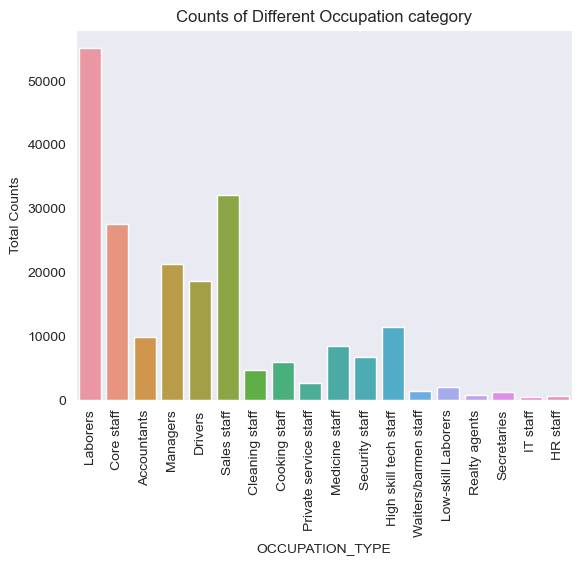

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


In [52]:
#Plotting a count plot for the 'OCCUPATION_TYPE' column to have more insights on the data(not considering null values) 
sns.set_style('dark')
sns.countplot(x='OCCUPATION_TYPE', data=new_df_app)
plt.title('Counts of Different Occupation category')
plt.ylabel('Total Counts')
plt.xticks(rotation=90)
plt.show()
print('=====================================================================================================')
print(new_df_app['OCCUPATION_TYPE'].value_counts())

##### Few Points:

Now, As per the above analysis we can infer that Laborers are the most applicant in the dataset


1. Firstly, since the column 'OCCUPATION_TYPE' is a one of critical variable to determine whether a loan could be approved/processed further or not and also, 
2. Secondly we need to understand that imputing the missing values(96391) which is quite high could impact the analysis process as we might wrongly consider few job categories. 

Hence, we would replace the missing/NaN values with a new category 'Missing_Occupation_Details'

In [53]:
#Imputing the missing/NaN values with 'Missing_Occupation_Details' Category
new_df_app['OCCUPATION_TYPE']=new_df_app['OCCUPATION_TYPE'].fillna('Missing_Occupation_Details')

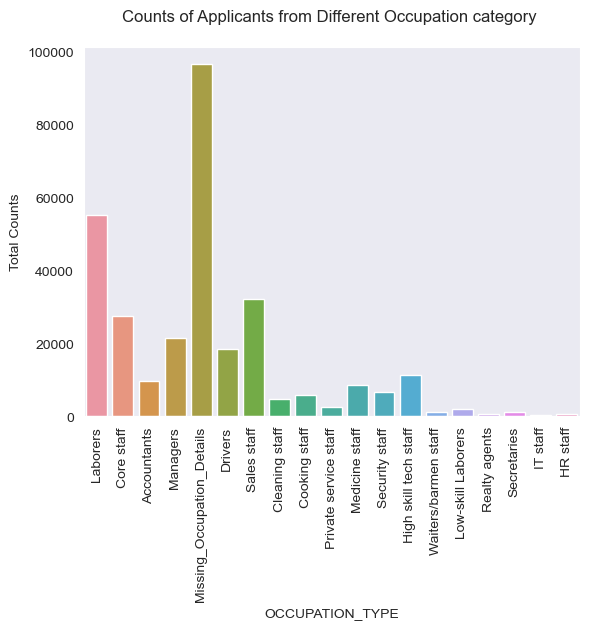

Missing_Occupation_Details    96391
Laborers                      55186
Sales staff                   32102
Core staff                    27570
Managers                      21371
Drivers                       18603
High skill tech staff         11380
Accountants                    9813
Medicine staff                 8537
Security staff                 6721
Cooking staff                  5946
Cleaning staff                 4653
Private service staff          2652
Low-skill Laborers             2093
Waiters/barmen staff           1348
Secretaries                    1305
Realty agents                   751
HR staff                        563
IT staff                        526
Name: OCCUPATION_TYPE, dtype: int64


In [54]:
#Plotting and Checking the graph again for 'OCCUPATION_TYPE'

sns.countplot(x='OCCUPATION_TYPE', data=new_df_app)
plt.title('Counts of Applicants from Different Occupation category \n')
plt.ylabel('Total Counts')
plt.xticks(rotation=90)
plt.show()
print('=============================================================================================================')
print(new_df_app['OCCUPATION_TYPE'].value_counts())

## Inference:

1. From the graph above, we can still say that Laborers are still the highest count of Applicant in the dataset.
2. From the graph above, we can also infer that IT Staff are the least count of Applicant in the dataset.


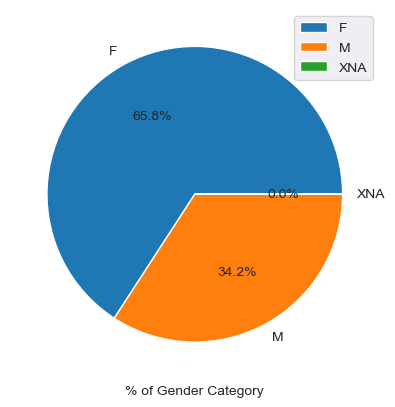

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [55]:
#Now Analysing the 'CODE_GENDER' column to have more insights
new_df_app['CODE_GENDER'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.xlabel('% of Gender Category')
plt.show()
print('=============================================================================================')
new_df_app['CODE_GENDER'].value_counts()

### Note:
We notice from the above visuals that we have some 'XNA' Values in the gender column. 
Since, Female count is more in the dataset column, imputing the 'F' in the 4 rows would not make such big impact hence, replacing the same with 'F'

F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64


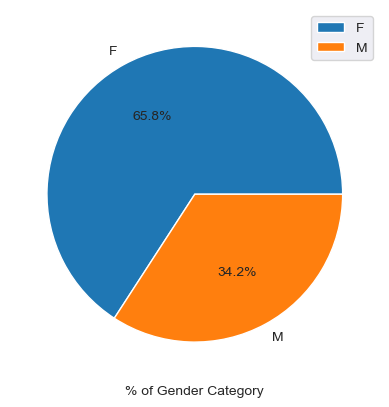

In [56]:
#Replacing the 'XNA' in the gender column with 'F' and plotting it again
new_df_app.loc[new_df_app['CODE_GENDER']=='XNA','CODE_GENDER']='F'
print(new_df_app['CODE_GENDER'].value_counts(normalize=True)*100)
print('=================================================================================================== ')
new_df_app['CODE_GENDER'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.xlabel('% of Gender Category')
plt.show()

## Inference:

1. From the graph and data above, we can conclude that most of the applicants are females(F) which is around 65.8%.

### 1.4 Checking the dataset(Application Data) 

In [57]:
new_df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

###### Upon chekcing the above datatype and the respective columns data we can conclude that the datatype are correct.Hence, not making any conversion. 

###### As we have completed the Data Cleaning and fixing process for the Application dataset we will now move on to our Univariate/Bivariate Analysis.

## 1.5: Univariate Analysis  


### 1.5.1: Analysing the Target Column

0    91.9
1     8.1
Name: TARGET, dtype: float64


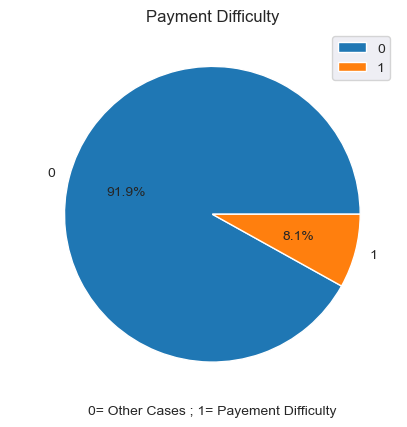

In [58]:
#Analysing the Target column where it give the person(he/she) with payment difficulty and other cases. 

print(round(new_df_app.TARGET.value_counts(normalize=True)*100,1))
print('====================================================================================================== ')
new_df_app.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend()
plt.title("Payment Difficulty")
plt.ylabel(' ')
plt.xlabel('0= Other Cases ; 1= Payement Difficulty')
plt.show()


## Inference: 

Based on the above graph, we noticed that there is a data imbalance with 91.9% as non-defaulters and 8.1% as deafulters

In [59]:
#Checking the ratio of the Target Variable 
X=new_df_app[new_df_app.TARGET==0].shape[0]
Y=new_df_app[new_df_app.TARGET==1].shape[0]

Ratio=round(X/Y,2)
print(Ratio)

11.39


#### Conclusion: 01 in every 11 applicants has the payment difficulty.

### 1.5.2: IDENTIFYING THE OUTLIERS

###### Based on the below analysis we can get more insights on whether the repective column has any strange/odd value which we would analyse using the boxplot 

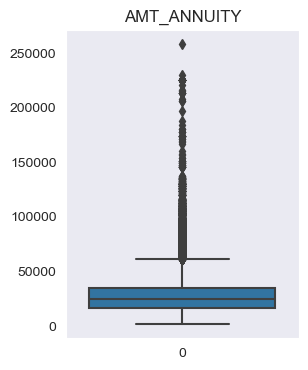

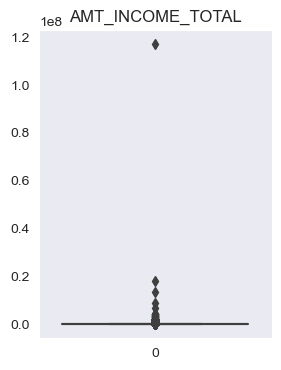

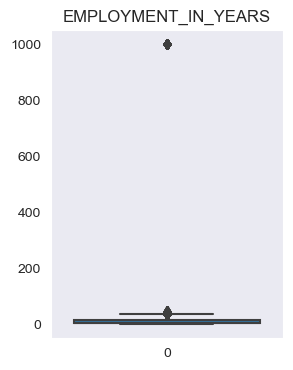

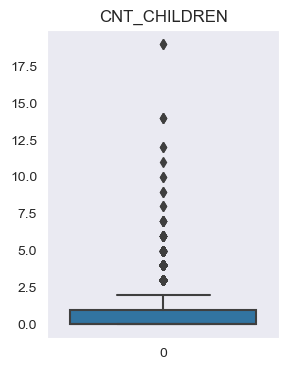

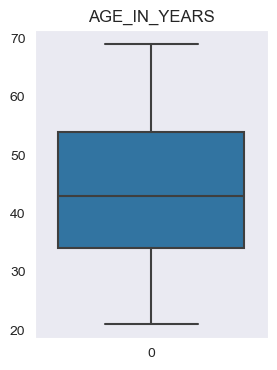

In [60]:
col=['AMT_ANNUITY','AMT_INCOME_TOTAL', 'EMPLOYMENT_IN_YEARS','CNT_CHILDREN', 'AGE_IN_YEARS']

for i in col:
    plt.figure(figsize=[3,4])
    sns.boxplot(new_df_app[i])
    plt.title(i)
    plt.show()

## Inference:

1. Firstly from the 'AMT_ANNUITY' plot we can identify that there is one outlier with a huge amount of loan taken nearly above 2,50,000
2. Secondly, from the 'AMT_INCOME_TOTAL' plot we can identify that there is an outlier where the income for a person is around (1.2 million).

3.Thirdly, from the 'DAYS_EMPLOYED' column we can see that one outlier is there whether the applicant has been employeed for a very long time and could be a possibility that he is near to retirement.

4. Fourthly, from the 'CNT_CHILDREN' plot we can identify that there is an outlier where an applicant has more than 18 children. 
5. Lastly, no outliers were observed for the 'AGE_IN_YEARS' column however, we can see that there are certain applicant who are at elderly age(60+).

### 1.5.3: ANALYSING THE TYPES OF LOANS (in %)

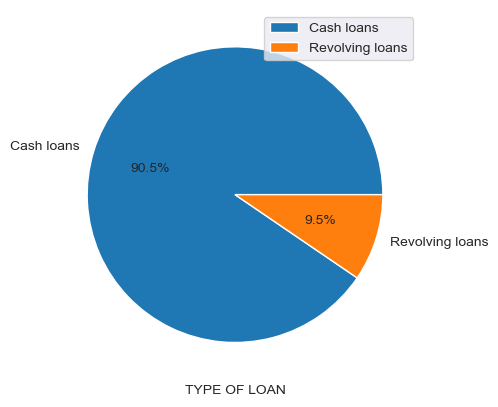

In [61]:
#Analysing the counts of different type of loan issued/Applied by the applicants
new_df_app['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(loc='best')
plt.ylabel('')
plt.xlabel('TYPE OF LOAN')
plt.show()

## Inference:

1. From the above graphical representation we can say most of the loan applicants has applied for is Cash Loan(90.5%) as compared with Revolving Loans(9.5%)
2. From the above graph, we can interpret that Revolving loan is applied very less in number as compared with Cash loan. This could be possibly as Revolving loan are generally lended to business

### 1.5.4: ANALYSING THE % of APPLICANT OWNING/NOT OWNING A CAR

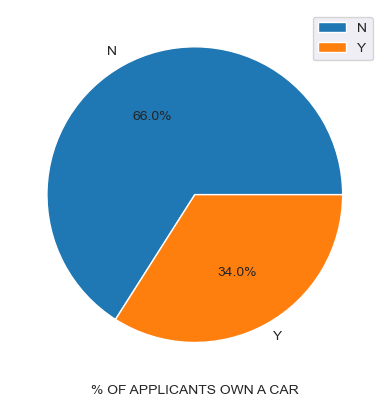

In [62]:
#Analysing the percent of Applicant owning/not owning a car.
new_df_app['FLAG_OWN_CAR'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.xlabel('% OF APPLICANTS OWN A CAR')
plt.show()

## Inference:
1. From the above graph we can interpret that most of the applicant does not own a car.

### 1.5.5: ANALYSING THE % of APPLICANT OWNING/NOT OWNING A HOUSE/FLAT

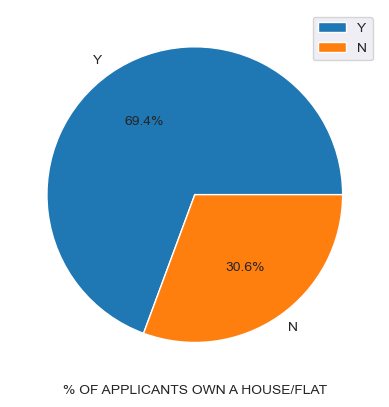

In [63]:
#Analysing the percent of Applicant owning/not owning a house or flat.
new_df_app['FLAG_OWN_REALTY'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.xlabel('% OF APPLICANTS OWN A HOUSE/FLAT')
plt.show()

## Inference:
1. From the above graph we can interpret that most of the applicant does own a house/flat which is at (69.4%). 

### 1.5.6: ANALYSING THE  COLUMNS DATA concerning with SOCIAL CIRCLE

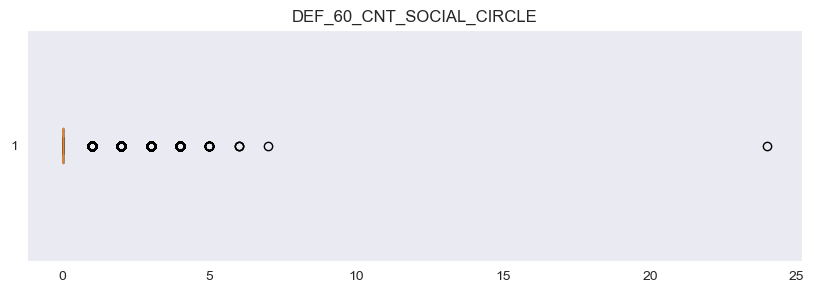

count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
50%           0.000000
99%           2.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


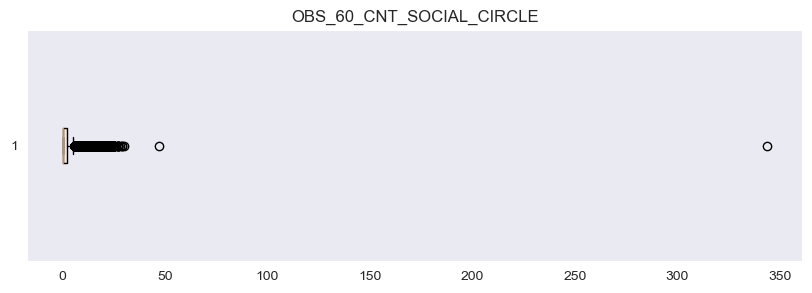

count    307511.000000
mean          1.403947
std           2.375964
min           0.000000
50%           0.000000
99%          10.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


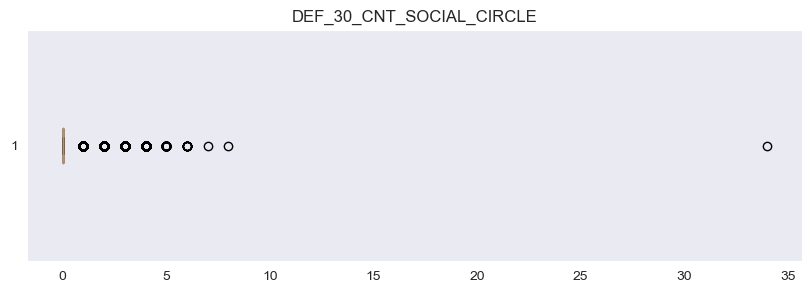

count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
50%           0.000000
99%           2.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


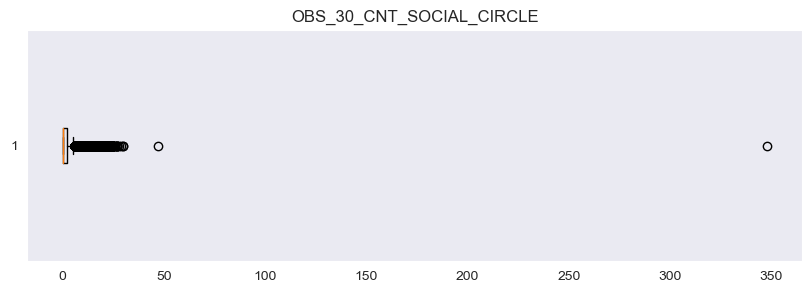

count    307511.000000
mean          1.420843
std           2.397123
min           0.000000
50%           0.000000
99%          10.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


In [64]:
SOC_COLS=['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']

for i in SOC_COLS:
    plt.figure(figsize=[10,3])
    plt.title(i)
    plt.boxplot(new_df_app[i], vert=False)
    plt.show()
    print(new_df_app[i].describe(percentiles=[0.99]))

#### Observations from the above BOXPLOT

1. Based on observing the above DEF_60_CNT_SOCIAL_CIRCLE graph, we can conclude that the outliers is 24 as these is above 99%
2. Based on observing the above OBS_60_CNT_SOCIAL_CIRCLE graph, the outliers is similar to OBS_30_CNT_SOCIAL_CIRCLE graph, close to 50 and close to 350(344) are outliers as these are above 99%
2. Based on observing the above DEF_30_CNT_SOCIAL_CIRCLE graph, we could clearly see that 34 is an outliers as these are above 99%.
4. OBS_30_CNT_SOCIAL_CIRCLE: Based on observing, we could clearly see that close to 50 and close to 350 are outliers as these are above 99%

### 1.5.7: ANALYSING THE AGE_IN_YEARS COLUMN

##### Before Analysing for better visualisation and understanding we will use age-groups where we will make age buckets using the column data

In [65]:
#Creating the bins as mentioned above for the age_in_years in a new column named 'AGE_RANGE'

new_df_app['AGE_RANGE'] = pd.cut(new_df_app['AGE_IN_YEARS'], [10, 20, 30, 40, 50, 60, 70],labels=['0-18','18-30','30-40', '40-50', '50-60', '60 and above'])

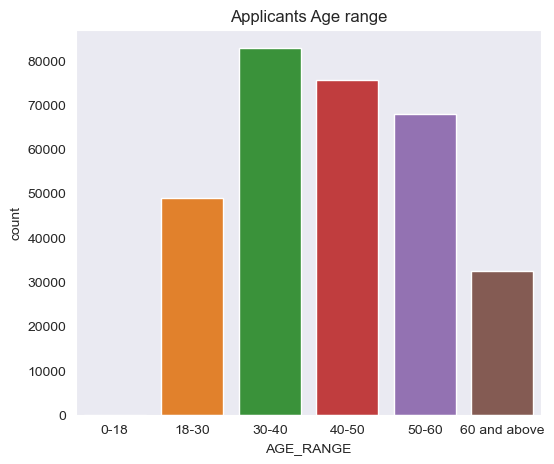

In [66]:
#plotting using countplot for AGE_RANGE to understand which variation of applicant as per the age group 
plt.figure(figsize=[6,5])
sns.countplot(x= 'AGE_RANGE', data = new_df_app)
plt.title('Applicants Age range')
plt.show()

## Inference:

1. From the above graph, we can conclude that most of the applicant are in the age group of 30-40.
2. From the above graph, we can conclude that in the age group of 60 and above there are less applicant as compared overall. This is understandable as issuing a loan to someone in that age group could be risky and lead to deafulter or payment issue. 

### 1.5.8: Analysing the income range of the applicants 

##### Before plotting and anlysis we need to create bucket or slabs to have a clear representation of the data.

In [67]:
# Creating bins for applicant's income

bins = [0,20000,50000,70000,100000,120000,150000,170000,200000,220000,250000,270000,300000,320000,350000,370000,400000,420000,450000,470000,500000,10000000000]
income_slabs = ['0-20000', '20000-50000','50000-70000','70000-100000','100000-120000', '120000-150000', '150000-170000','170000-200000',
       '200000-220000','220000-250000','250000-270000','270000-300000','300000-320000','320000-350000','350000-370000',
       '370000-400000','400000-420000','420000-450000','450000-470000','470000-500000','500000 and above']

new_df_app['AMT_INCOME_RANGE']=pd.cut(new_df_app['AMT_INCOME_TOTAL'],bins,labels=income_slabs )

###### Based on the above income slab created for the income range hence, using the same to plot a countplot to analyse better and have more insights

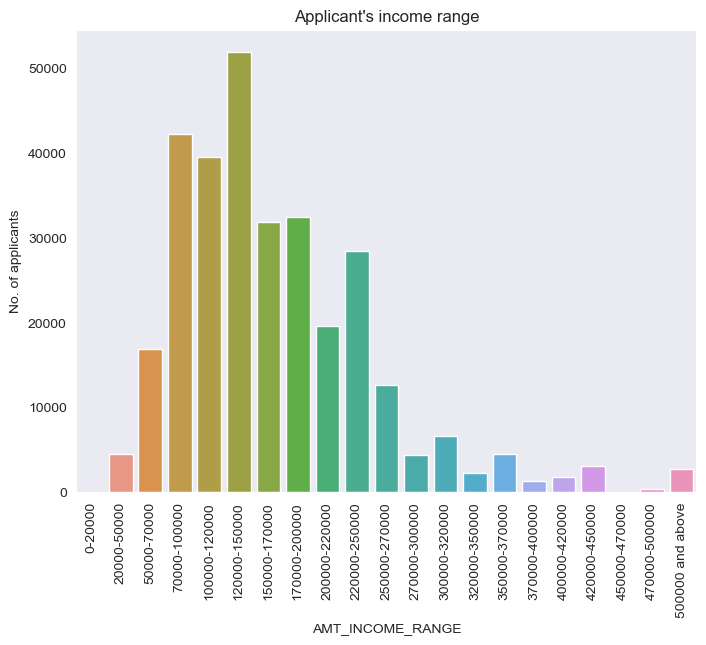

In [68]:
#Plotting countplot for the income_range of the applicants
plt.figure(figsize=[8,6])
sns.countplot(x='AMT_INCOME_RANGE', data=new_df_app)
plt.ylabel('No. of applicants')
plt.xticks(rotation=90)
plt.title('Applicant\'s income range' )
plt.show()

## Inference:

1. From the above graphs, we can conclude that Number of Applicants are higher in the group of (1,20,000-1,50,000) which is low as compared to the income range given in the dataset.
2. This is logical as people with less income will only go for a loan. However, we do see applicants with income 5,00,000 and above which is strange but as we know people do take loans in order to save tax and get benifit which could be a scenario.   

### 1.5.9: Analysing the Family/Marital Status of the applicants 

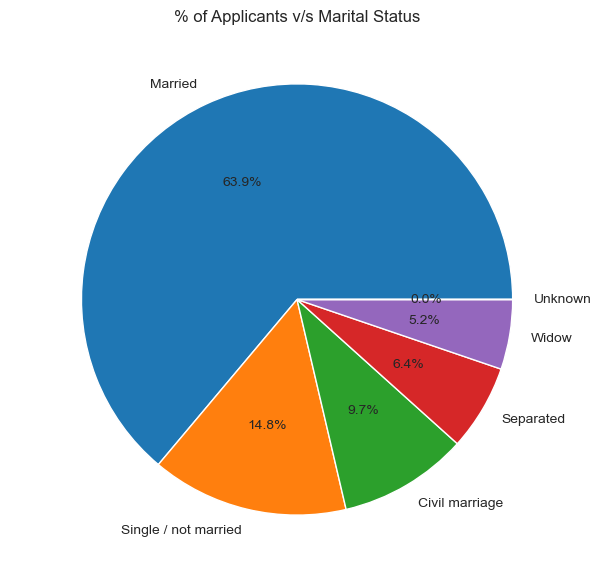

In [69]:
#Plotting pie chart for the Name Family Status
plt.figure(figsize=[7,7])
plt.title('% of Applicants v/s Marital Status')
new_df_app['NAME_FAMILY_STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel(' ')
plt.xlabel('')
plt.show()

### Inference:

1. From the above graph, we can say that most of the applicant's marital status is married which is at 63.9% following Single/not married category which is at 14.8%.
2. From the above graph, we can say that least of the applicant's are widow which is at 5.2% 

### 1.5.10: Analysing the Eductaion Category of the applicants 

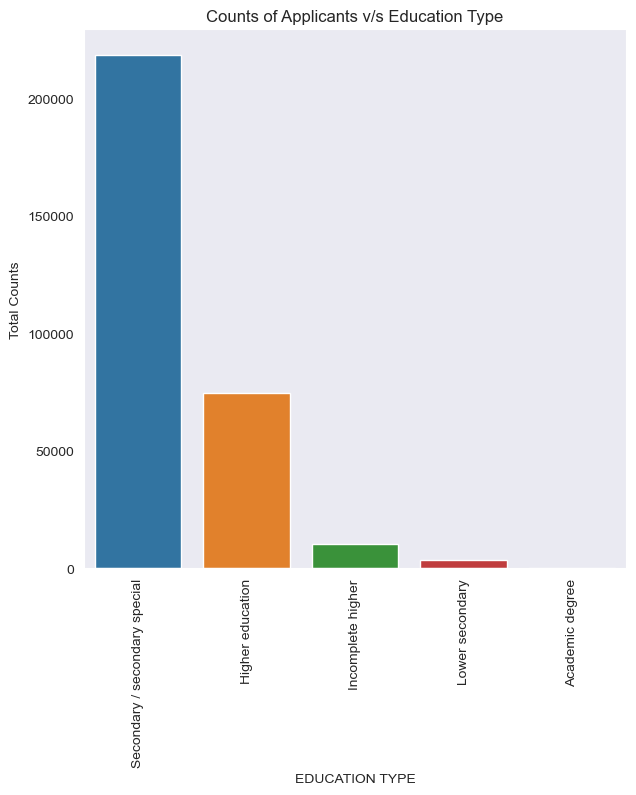

In [70]:
#Plotting countplot for the NAME_EDUCATION_TYPE
plt.figure(figsize=[7,7])
plt.title('Counts of Applicants v/s Education Type')
sns.countplot(x= 'NAME_EDUCATION_TYPE', data = new_df_app)
plt.ylabel('Total Counts')
plt.xlabel('EDUCATION TYPE')
plt.xticks(rotation=90)
plt.show()

### Inference: 

From the above graph we can interpret that most number of Applicants belong to the 'Secondary/Secondary special' Education Category

## Now we would analyse with regards to Defaulter and Non-Defaulter


### 1.5.11: ANALYSIS OF DEFAULTER V/S NON-DEFAULTER WITH GENDER

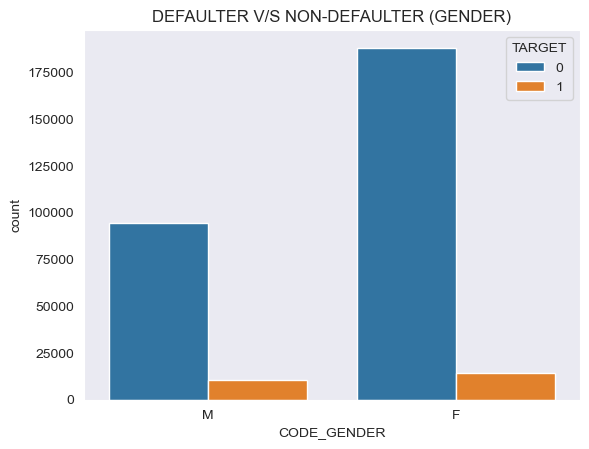

In [71]:
plt.title('DEFAULTER V/S NON-DEFAULTER (GENDER)')
sns.countplot(data= new_df_app , x='CODE_GENDER', hue='TARGET')
plt.show()

### Inferences:

##### + Visual Representation For CODE_GENDER:

As we have seen earlier We can see that female are majority of the applicants and now we see that they are more disciplined in paying back the loan. 

### 1.5.12: ANALYSIS OF DEFAULTER V/S NON-DEFAULTER WITH AGE_RANGE

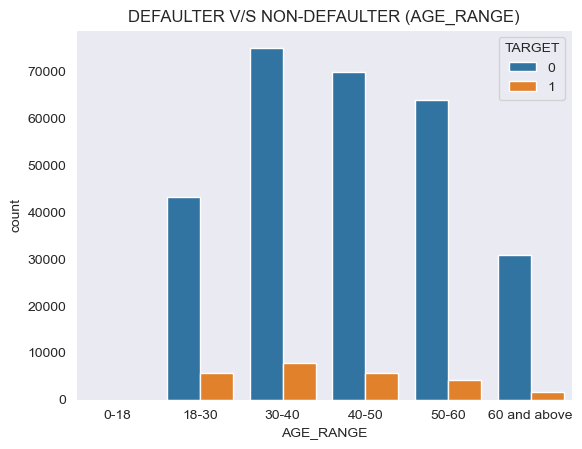

In [72]:
plt.title('DEFAULTER V/S NON-DEFAULTER (AGE_RANGE)')
sns.countplot(data= new_df_app , x='AGE_RANGE', hue='TARGET')
plt.show()

### Inference

##### + Visual Representation For AGE_RANGE:

We see that the age group of 30-40 are disciplined in paying back the debt. however, we also do see that the number of defauter is also high in the same age group when compared to others

### 1.5.13: ANALYSIS OF DEFAULTER V/S NON-DEFAULTER WITH AMT_INCOME_RANGE

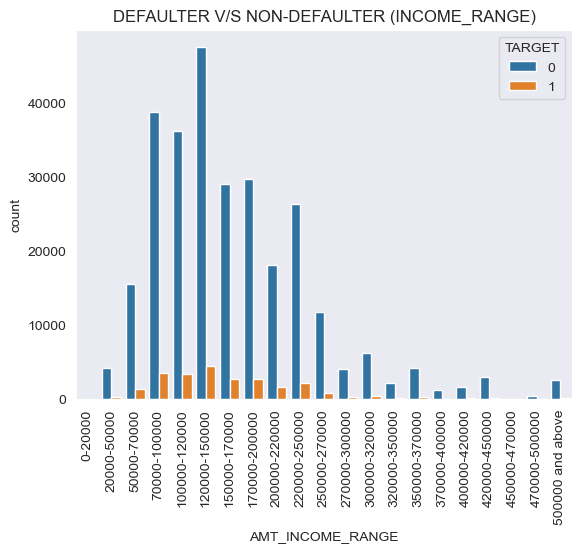

In [73]:
plt.title('DEFAULTER V/S NON-DEFAULTER (INCOME_RANGE)')
sns.countplot(data= new_df_app , x='AMT_INCOME_RANGE', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

## Inference: 

##### +  Visual Representation For AMT_INCOME_RANGE:

As we have seen from earlier plots, that most of the applicants belong to the income group(120000-150000) similarly we do see that the same income group has the maximum non-defaulter

### 1.5.14: ANALYSIS OF DEFAULTER V/S NON-DEFAULTER WITH NAME_EDUCATION_TYPE

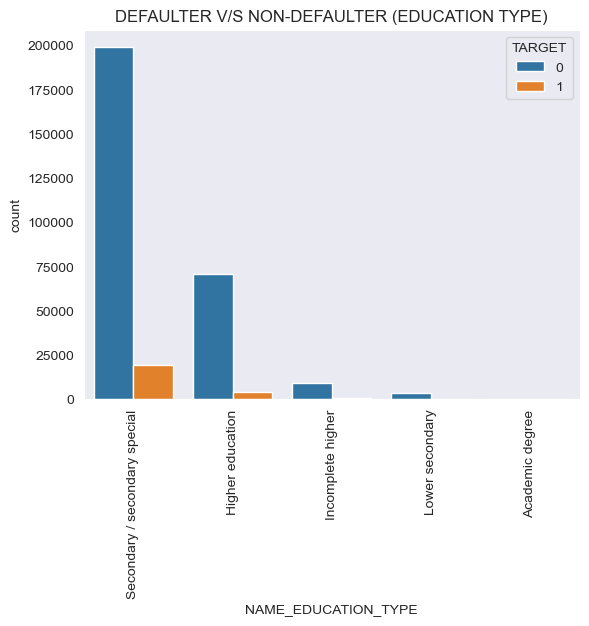

In [74]:
plt.title('DEFAULTER V/S NON-DEFAULTER (EDUCATION TYPE)')
sns.countplot(data= new_df_app , x='NAME_EDUCATION_TYPE', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

### Inference:

##### +  Visual Representation For NAME_EDUCATION_TYPE:

We can see that the applicants having the Secondary/secondary special education type are the most disciplined group when it comes to paying back the loan on time. 

### 1.5.15: ANALYSIS OF DEFAULTER V/S NON-DEFAULTER WITH OCCUPATION_TYPE 

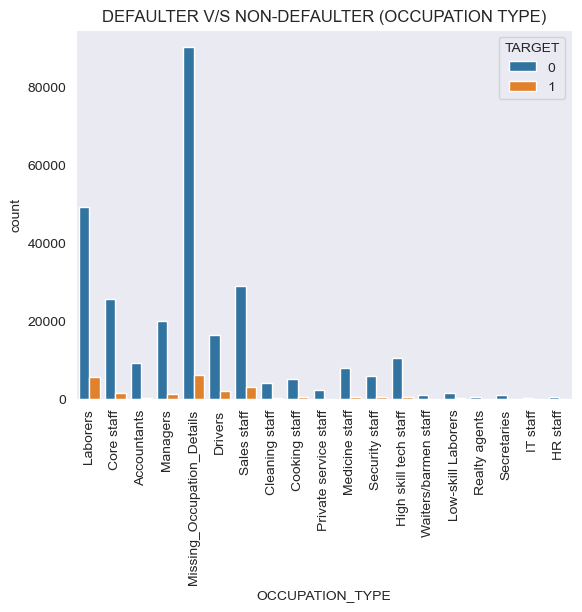

In [75]:
plt.title('DEFAULTER V/S NON-DEFAULTER (OCCUPATION TYPE)')
sns.countplot(data= new_df_app , x='OCCUPATION_TYPE', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

### Inference:

##### +  Visual Representation For OCCUPATION_TYPE:-

We see that applicants belonging to the 'Laborer' occupation category are paying back the loan amount in a proper mannaer however, small chunk of applicants from the same group is also missing their payements.

### 1.5.16: ANALYSIS OF DEFAULTER V/S NON-DEFAULTER WITH OWNING A HOUSE/FLAT

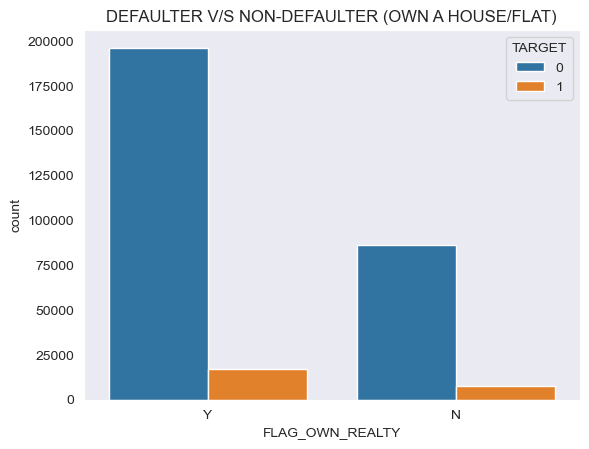

In [76]:
plt.title('DEFAULTER V/S NON-DEFAULTER (OWN A HOUSE/FLAT)')
sns.countplot(data= new_df_app , x='FLAG_OWN_REALTY', hue='TARGET')
plt.show()

## Inference: 

Here we get a good insight that applicant owning a house/flat are more disciplined in paying back the loan amount on time and hence we see a high amount of non-defaulter as compared to the applicants who does not own a house/flat.

#####  Here we complete our univariate Analysis

## 1.7: Bivariate Analysis:

##### Now we would move to bivariate analysis. 

###### Firstly, we would need to select the columns v/s column we intend to analyse 

### 1.7.1: ANALYSING THE NAME_EDUCATION_TYPE v/s AMT_INCOME_RANGE

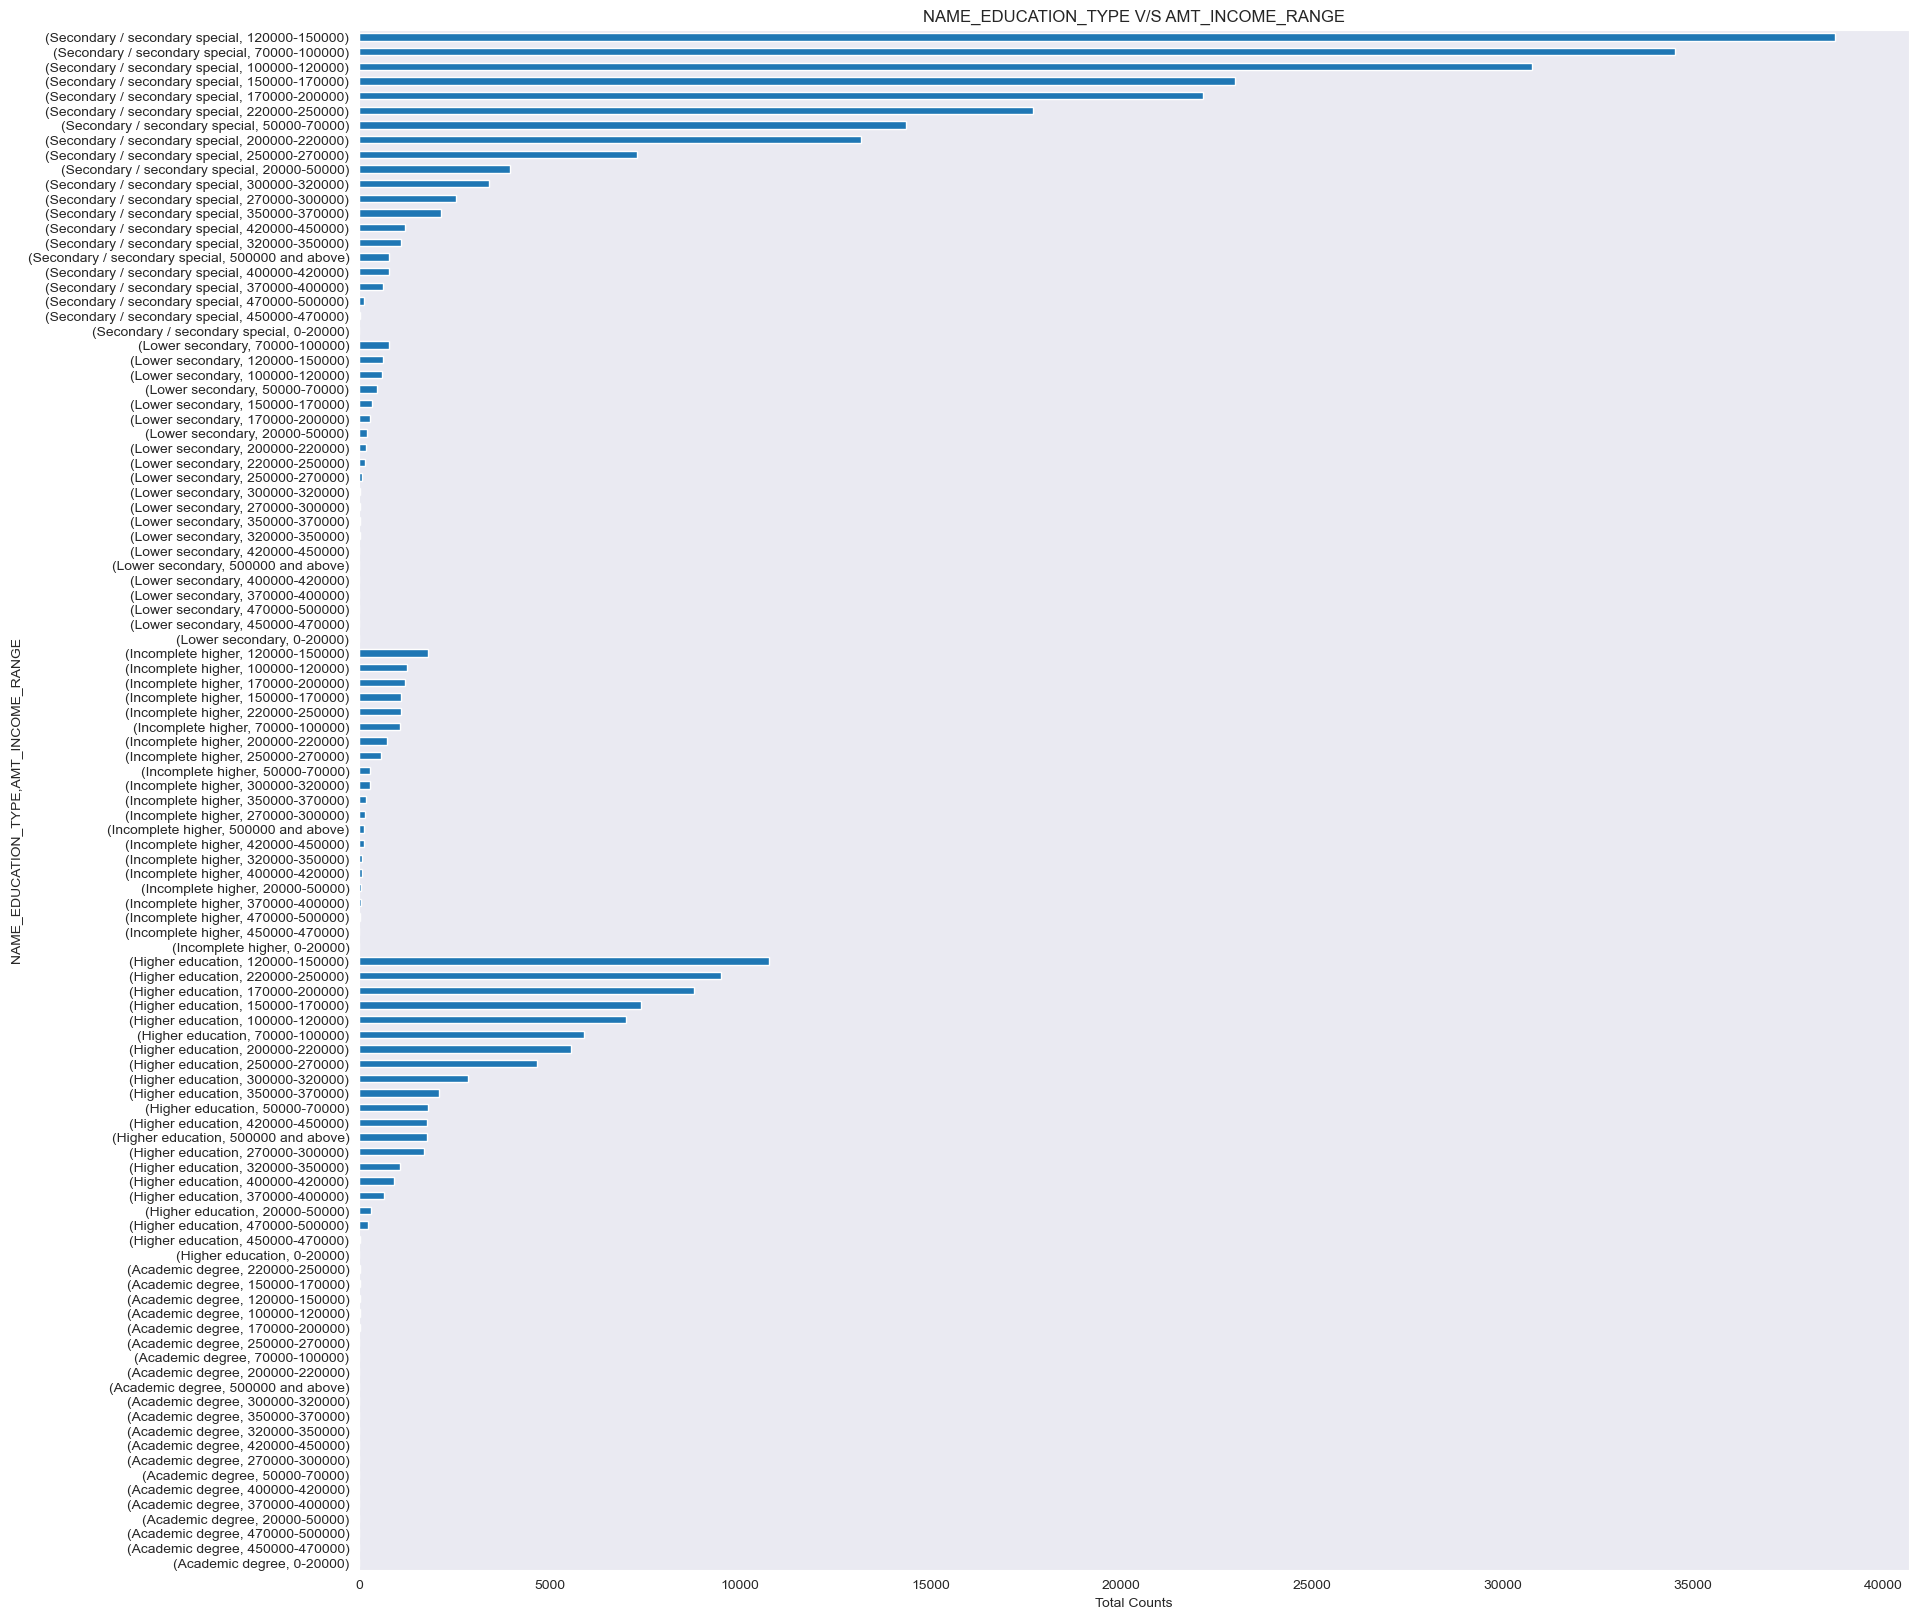

In [77]:
plt.figure(figsize=[20,20])
new_df_app.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_RANGE'].value_counts(ascending=True).plot.barh()
plt.title('NAME_EDUCATION_TYPE V/S AMT_INCOME_RANGE')
plt.xlabel('Total Counts')
plt.show()

## Inference:

1. Based on the graph we can say that as we have earlier seen that most/majority of the applicant belongs to the income group of (1,20,000 to 1,50,000) and now we can conclude that from the same income group majority belongs to the Secondary/secondary special education category) followed by Higher Education. 


### 1.7.2: ANALYSING THE NAME_EDUCATION_TYPE v/s AGE_RANGE

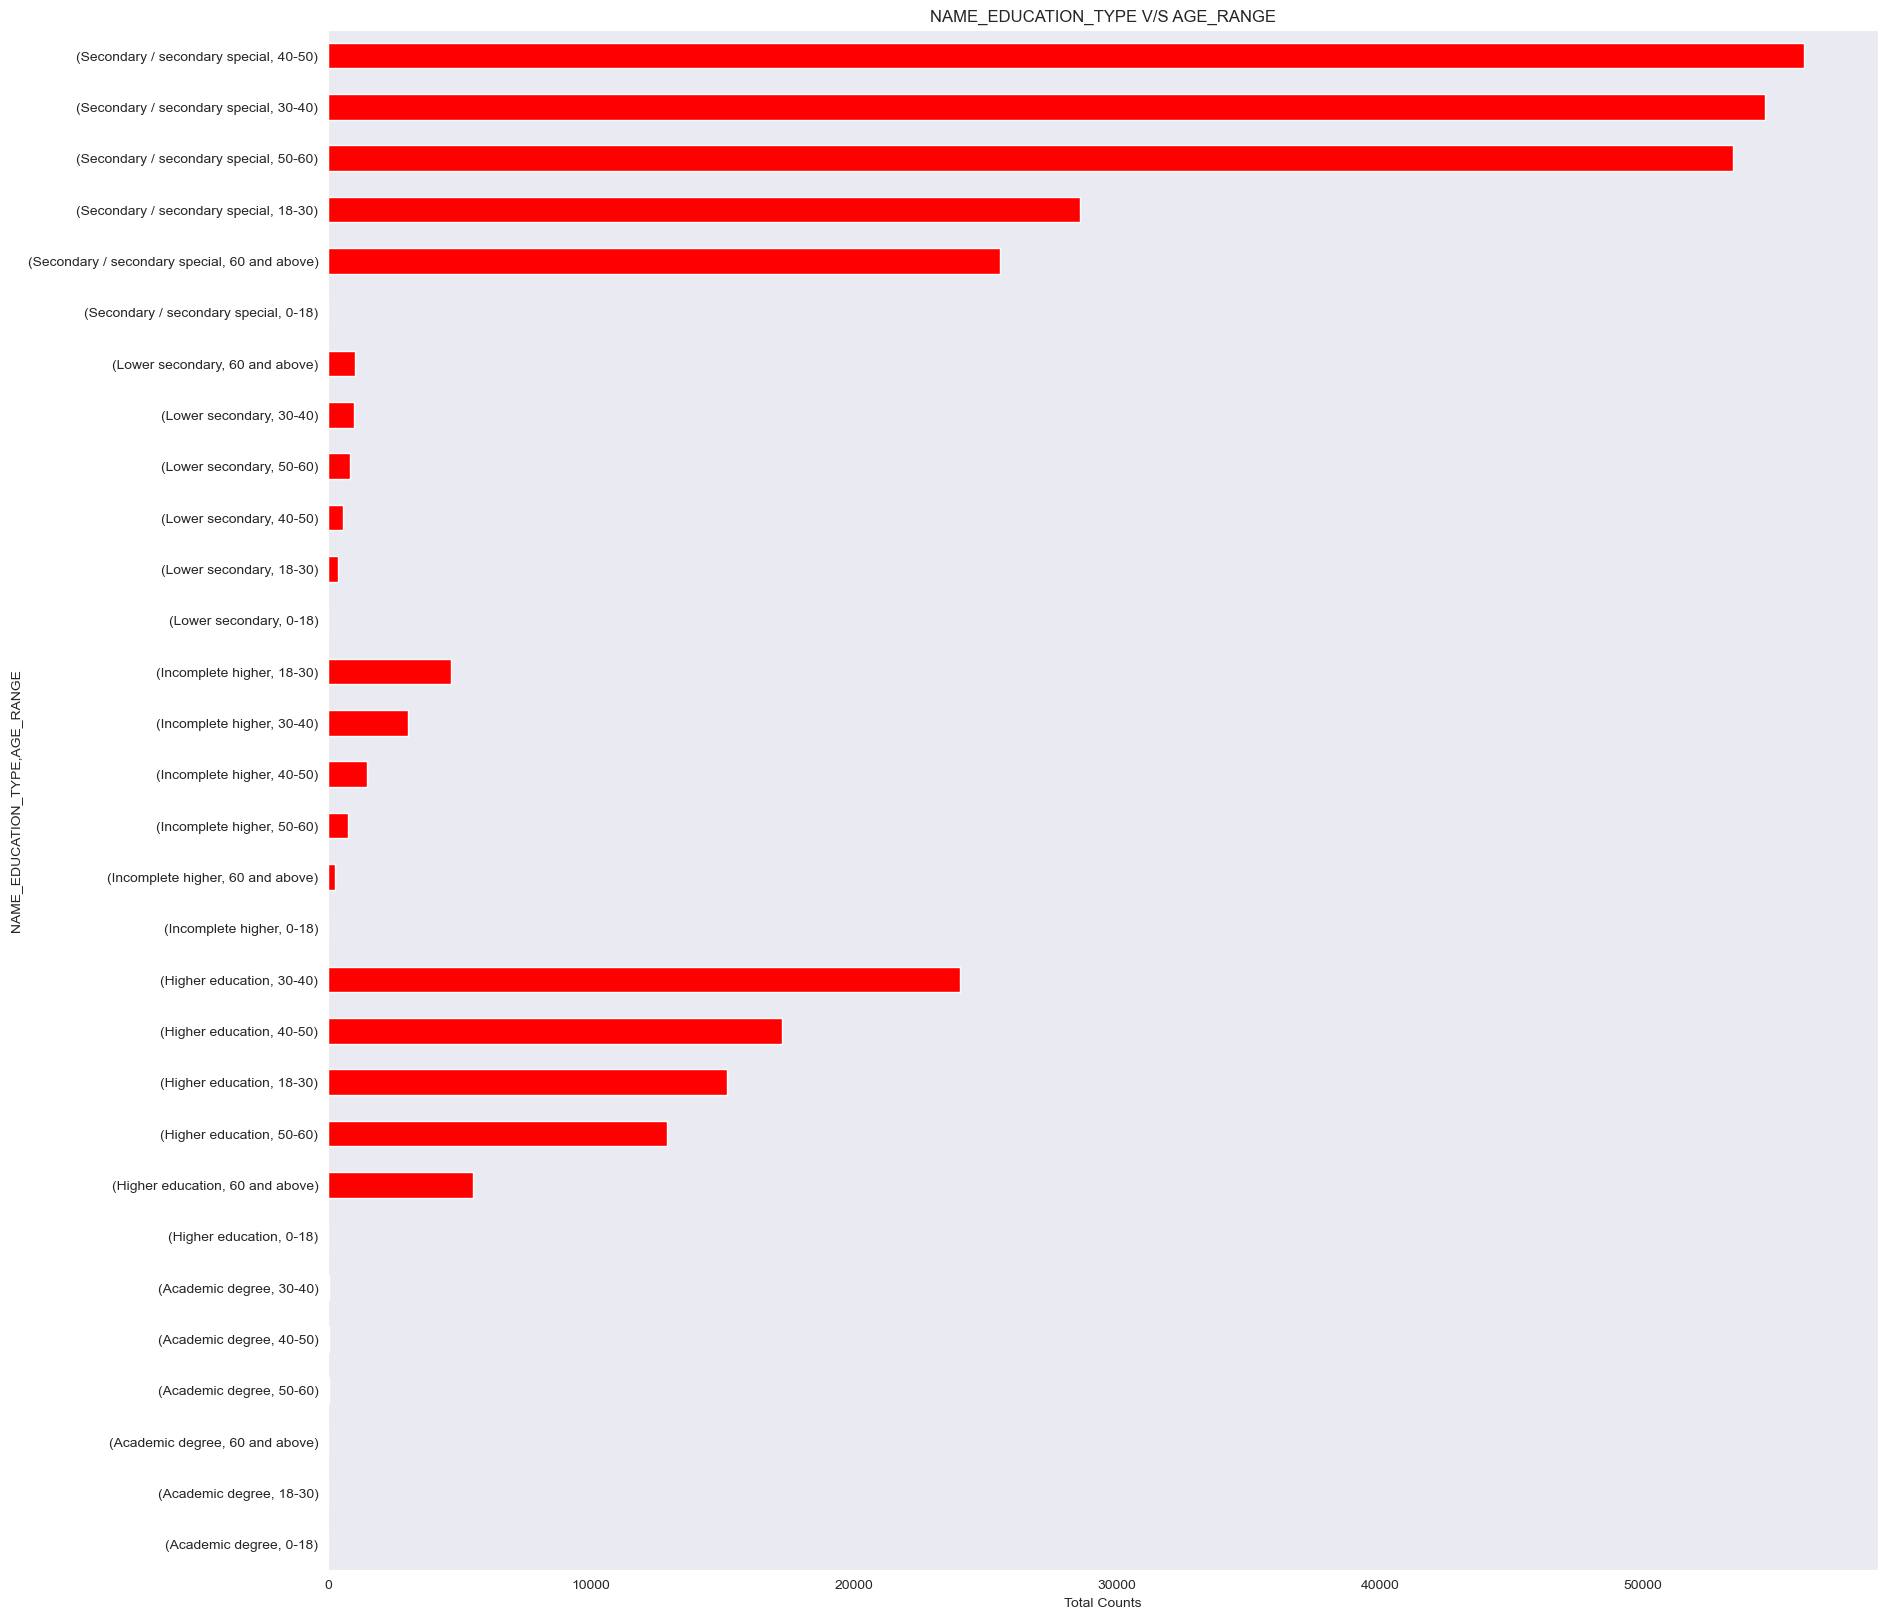

In [78]:
plt.figure(figsize=[20,20])
new_df_app.groupby('NAME_EDUCATION_TYPE')['AGE_RANGE'].value_counts(ascending=True).plot.barh(color='red')
plt.title('NAME_EDUCATION_TYPE V/S AGE_RANGE')
plt.xlabel('Total Counts')
plt.show()

## Inference: 

From the above graphical representation, we can interpret that most of the applicants lies in the age range of 40-50 and has Secondary/secondary special education.

### 1.7.3: ANALYSING THE NAME_EDUCATION_TYPE v/s AMT_CREDIT

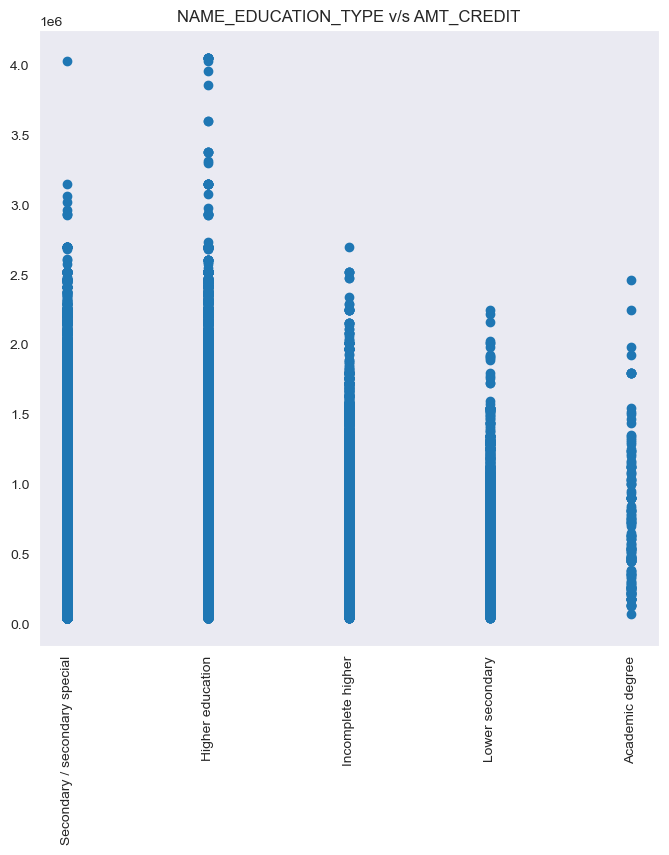

In [79]:
plt.figure(figsize=[8,8])
plt.title("NAME_EDUCATION_TYPE v/s AMT_CREDIT")
plt.scatter(new_df_app['NAME_EDUCATION_TYPE'], new_df_app['AMT_CREDIT'])
plt.xticks(rotation=90)
plt.show()

### Inference:

1. From the above graphical representation we see that for Applicants with 'Incomplete Higher', 'Lower Secondary' and 'Academin Degree' Education has not applied for higher loan amount
2. Whereas, on the other hand we see that few applicants with 'Secondary/secondary special' has applied for higher loan amount, one with highest.
3. Applicants with 'Higher Education' has majority of applicants who had applied for higher loan amount. 

### 1.7.4: ANALYSING THE NAME_CONTRACT_TYPE v/s NAME_HOUSING_TYPE

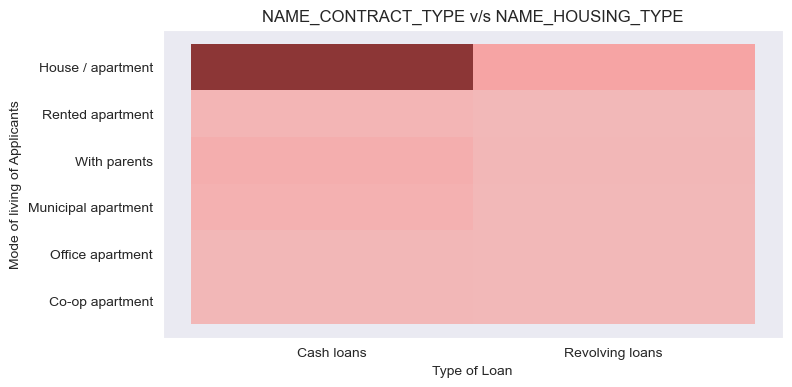

In [80]:
plt.figure(figsize=[8,4])
plt.title("NAME_CONTRACT_TYPE v/s NAME_HOUSING_TYPE")
sns.histplot(x=new_df_app['NAME_CONTRACT_TYPE'], y=new_df_app['NAME_HOUSING_TYPE'], data=new_df_app, color='Red')
plt.xlabel('Type of Loan')
plt.ylabel('Mode of living of Applicants')
plt.show()

### Inference:

From the above visual, we can interpret that most applicants availing cash loan lives in house/appartment.

### 1.7.5: ANALYSING THE NAME_CONTRACT_TYPE v/s AGE_RANGE 

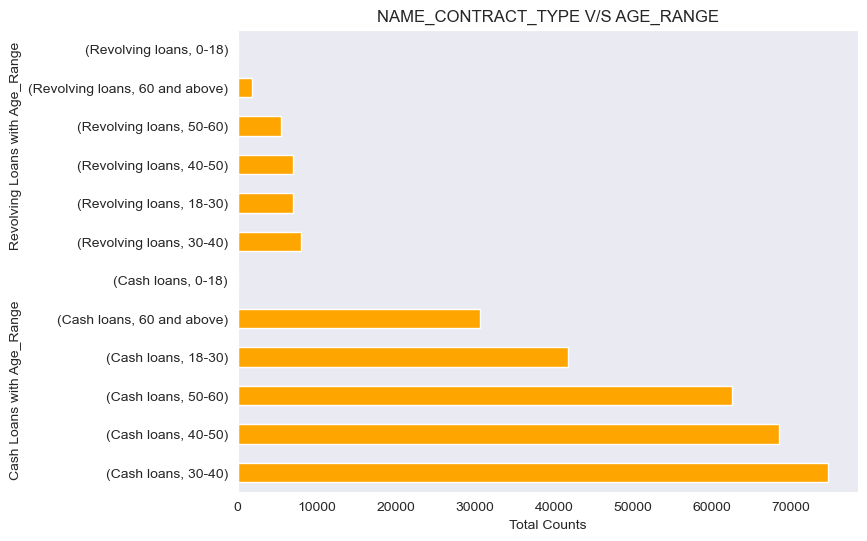

In [81]:
plt.figure(figsize=[8,6])
new_df_app.groupby('NAME_CONTRACT_TYPE')['AGE_RANGE'].value_counts(ascending=False).plot.barh(color='orange')
plt.title('NAME_CONTRACT_TYPE V/S AGE_RANGE')
plt.ylabel('Cash Loans with Age_Range             Revolving Loans with Age_Range')
plt.xlabel('Total Counts')
plt.show()

### Inference: 

Based on the above analysis we can interpret that majority of the Applicants for Cash loan are from the Age group (30-40).

Now, we need to analyse the majority number of defaulter fall under which age groups

### 1.7.6: IDENTIFYING THE DEFAULTER V/S AGE GROUP

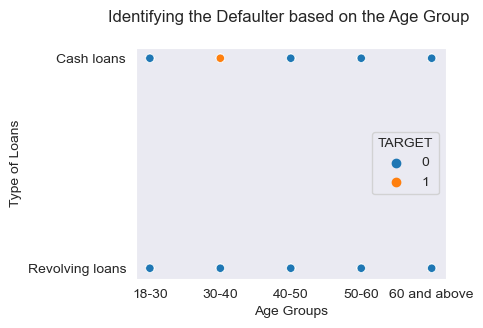

In [82]:
plt.figure(figsize=[4,3])
plt.title("Identifying the Defaulter based on the Age Group \n")
sns.scatterplot(data=new_df_app, x='AGE_RANGE', y='NAME_CONTRACT_TYPE', hue='TARGET')
plt.xlabel('Age Groups')
plt.ylabel('Type of Loans')
plt.show()

### Inference:

Based on the above plot, we can see that most of the defaulter belongs to the age group of (30-40) who has applied for cash loan

### 1.7.8: ANALYSING THE NAME_INCOME_TYPE v/s AMT_CREDIT 

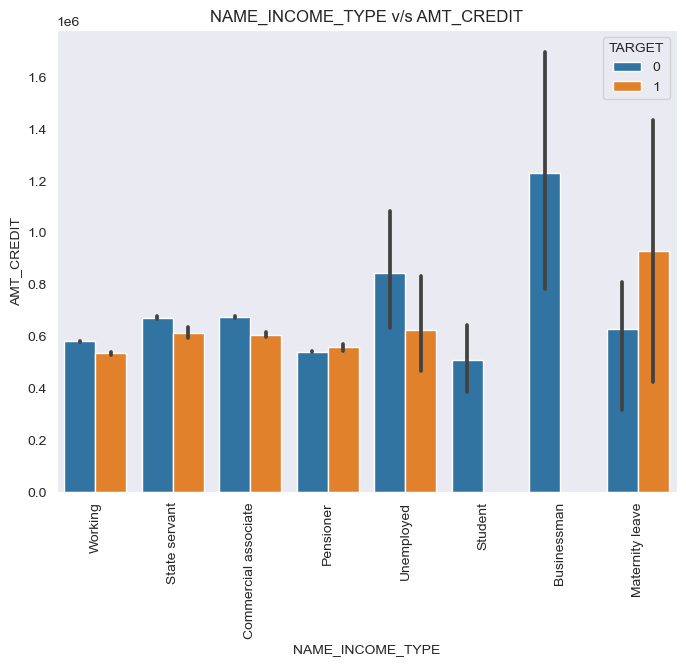

In [83]:
plt.figure(figsize=[8,6])
plt.title("NAME_INCOME_TYPE v/s AMT_CREDIT")
sns.barplot(data=new_df_app, x='NAME_INCOME_TYPE', y='AMT_CREDIT',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

### Inference:

1. Based on the above visual, we can say that the majority of applicants who are on Maternity leave are not able to pay their loan back and hence we see high defaulter following for those belonging to  Unemployed category are defaulter as they fall under low income range.
2. Again we see that for applicants belonging to Students and Businessman do not have any defaulter. 

### 1.7.9: ANALYSING THE OCCUPATION TYPE V/S AMOUNT CREDIT 

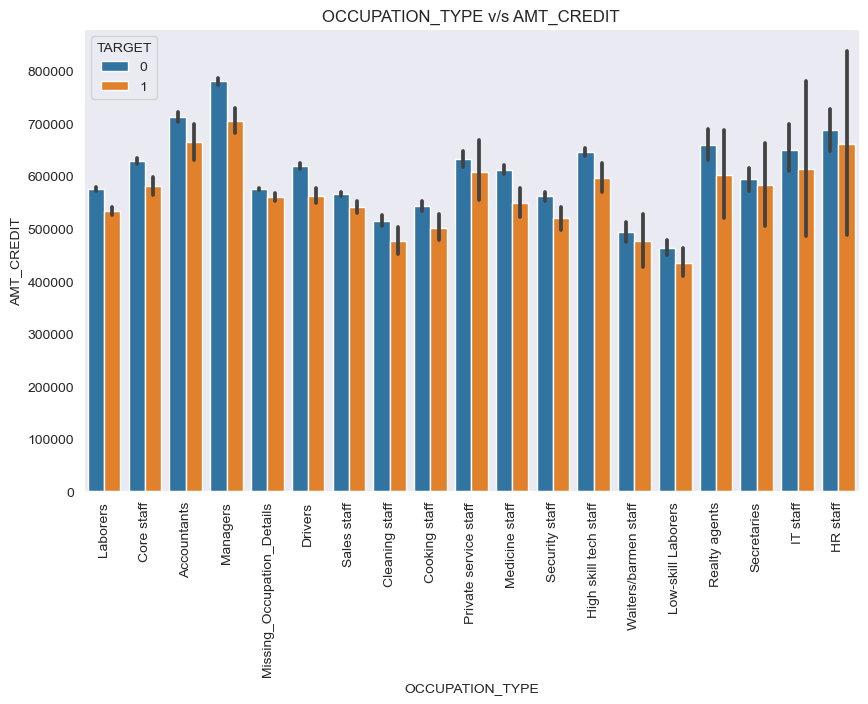

In [84]:
plt.figure(figsize=[10,6])
plt.title("OCCUPATION_TYPE v/s AMT_CREDIT")
sns.barplot(data=new_df_app, x='OCCUPATION_TYPE', y='AMT_CREDIT', hue='TARGET', estimator=np.mean)
plt.xticks(rotation = 90)
plt.show()

### Inference:

From the above graph, we can interpret that Applicants with occupation category as Manager has applied for maximum credit(loan)  

# 1.8: MULTIVARIATE ANALYSIS 

## 1.8.1: FINDING THE CORRELATION IN THE DATA

In [85]:
#Finding the correlation between different columns of Non_Defaulter Dataframe
Corr_app=new_df_app[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','CNT_CHILDREN','AMT_ANNUITY', 'AGE_IN_YEARS', 'EMPLOYMENT_IN_YEARS']].corr()
Corr_app

,AMT_GOODS_PRICE,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_ANNUITY,AGE_IN_YEARS,EMPLOYMENT_IN_YEARS
AMT_GOODS_PRICE,1.000000,0.986687,0.159664,0.061009,-0.002008,0.775111,0.053978,-0.061840
AMT_CREDIT,0.986687,1.000000,0.156870,0.063160,0.002145,0.770127,0.055482,-0.064317
AMT_INCOME_TOTAL,0.159664,0.156870,1.000000,0.016341,0.012882,0.191657,-0.027201,-0.063831
CNT_FAM_MEMBERS,0.061009,0.063160,0.016341,1.000000,0.879160,0.075538,-0.278751,-0.234363
CNT_CHILDREN,-0.002008,0.002145,0.012882,0.879160,1.000000,0.021374,-0.330812,-0.241583
AMT_ANNUITY,0.775111,0.770127,0.191657,0.075538,0.021374,1.000000,-0.009392,-0.102846
AGE_IN_YEARS,0.053978,0.055482,-0.027201,-0.278751,-0.330812,-0.009392,1.000000,0.623643
EMPLOYMENT_IN_YEARS,-0.061840,-0.064317,-0.063831,-0.234363,-0.241583,-0.102846,0.623643,1.000000


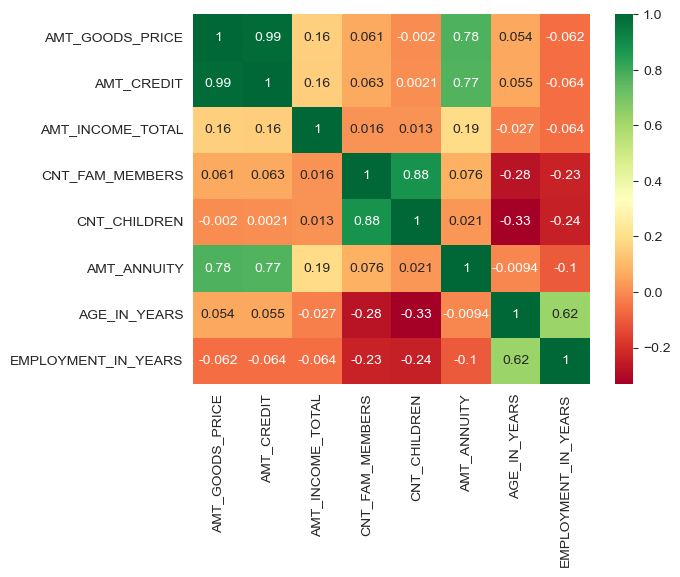

In [86]:
#Plotting a heatmap of the above correlation to have visual insights
sns.heatmap(Corr_app, cmap='RdYlGn', annot=True)
plt.show()

### Inference from the NON_DEFAULTER DATAFRAME:

1. Based on the above visual representation,firstly we can interpret that the amount taken for credit i.e 'AMT_CREDIT' has a high correlation factor with the amount goods price i.e 'AMT_GOODS_PRICE' which is understandable as more the goods price more is the loan amount.
2. Secondly, We do see a good correlation between 'AMT_ANNUITY', 'AMT_CREDIT' and 'AMT_GOODS_PRICE'.
3. Thirdly, we also see a good correlation between 'CNT_CHILDREN' and 'CNT_FAM_MEMBERS'.
4. We also see that a good correlation between 'AGE_IN_YEARS' and 'EMPLOYEMENT_IN_YEARS'.
5. lastly, we do see negative correlation with more time being employed(EMPLOYEMENT_IN_YEARS) and the loam amount being issued. which is again understable as bank would not give loan for senior people who are in verge of retirement as they might be leading to be as defaulter. 

###### Since, we have already imported the Previous Application Data (Section 2)

## 2.1: Data Inspection for Previous Application Dataset(df_pre)

##### Now we would inspect the Previous_application dataset i.e check for shape, size, null value, datatypes

In [87]:
#Checking the number of columns and number of rows in the dataset
df_pre.shape

(1670214, 37)

In [88]:
#Checking the total numbers of record in the dataset
df_pre.size

61797918

##### So, we have 37 columns in the dataset and the total number of records present in the data is 61797918

In [89]:
#Checking for the datatype of the dataset
df_pre.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [90]:
#Observing the first five rows of the dataset(df_pre)
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##### So we see that there are null(NaN) values, XAP, XNA values in some columns Hence , we need to fix/replace them based on analysing them
##### Based on observing the data above along with the datatype we can say that all the datatype are correct for the data

In [91]:
#Calculating the null value(%) in the dataset(df_pre)
round(100*(df_pre.isnull().mean()),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

##### We do see from the above that 'RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY' column has around  99.64% null value which does not make any sense to have for further analysis
##### Based on the analysis, we have taken 30% as cutoff percentage, hence, we will drop all the columns which have null value(%) more than 30

## 2.2: Dropping the column with null values above set cutoff


In [92]:
#Extracting the name of columns for the dataset(df_pre) with the set cutoff criteria(30%) for null value percentange
cutoff=30
pre_col_names=list(df_pre.columns[round(100*(df_pre.isnull().mean()),2)>cutoff])
pre_col_names

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [93]:
#Droping the columns with null value percentage more than 30% for the dataset(df_pre) using .loc function into a new dataframe
#this would retain all the rows and cols with null value less that 30%
new_df_pre=df_pre.loc[: , 100*(df_pre.isnull().mean())<30] 

In [94]:
#Rechecking the null value % of the remaining columns
new_df_pre.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

##### Now upon checking the datatype for the respective columns with null values we can say that for numerical coulmn we can impute the mean() value and for the categorical column we would use mode() method to do the same.

##### However, we need to anylase the 'AMT_GOODS_PRICE' column as we need to understand that whether to impute the mean() value or 0 based on the type of loan

In [95]:
new_df_pre[new_df_pre['AMT_GOODS_PRICE'].isnull()].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,9,Y,1,XNA,Refused,-239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


## 2.3: Imputing the missing/null values

##### Okay so, now we see that the null(NaN) value for 'AMT_GOODS_PRICE' column are with the respect to the Cash loans so we cannot impute with 0 as we did previously for application dataset. Hence, we would impute the mean() value of the respective column and impute the same 

##### For Analysing better we would create a list of the columns ( categorical and numerical) seperately. 

##### Categorical column we would use value_counts for getting all the values of each category in that columns. 

In [96]:
#Finding the value_counts for the 'PRODUCT_COMBINATION' column
new_df_pre['PRODUCT_COMBINATION'].value_counts() 

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [97]:
#Using mode function to fetch the most occuring category in the 'PRODUCT_COMBINATION' column
#Using [0] fucnction to fetch only the category
new_df_pre['PRODUCT_COMBINATION'].mode()[0]

'Cash'

In [98]:
#Replacing the above fetched category with the null values
new_df_pre['PRODUCT_COMBINATION']=new_df_pre['PRODUCT_COMBINATION'].fillna(new_df_pre['PRODUCT_COMBINATION'].mode()[0])

In [99]:
#Rechecking the null value in the 'PRODUCT_COMBINATION' column
new_df_pre['PRODUCT_COMBINATION'].isnull().sum()

0

##### Numerical coumn we would use describe to have more insights of the columns.

In [100]:
#Preparing a list of numerical columns need to checked(described) 
Cols_to_check=['CNT_PAYMENT','AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY']

In [101]:
#Using for loop to perform the check
for i in Cols_to_check:
    print(i)
    print(new_df_pre[i].describe())
    print('=============================================== ')

CNT_PAYMENT
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64
AMT_GOODS_PRICE
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64
AMT_CREDIT
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64
AMT_ANNUITY
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


##### Based on the above description we would use mean value of each column to fill the null value

In [102]:
#Filling the null value for'CNT_PAYMENT' column
new_df_pre['CNT_PAYMENT'].fillna(new_df_pre['CNT_PAYMENT'].mean(),inplace=True)

In [103]:
#Rechecking for the null value of the 'CNT_PAYMENT' column
new_df_pre['CNT_PAYMENT'].isnull().sum()

0

In [104]:
#Filling the null value for'AMT_GOODS_PRICE' column
new_df_pre['AMT_GOODS_PRICE'].fillna(new_df_pre['AMT_GOODS_PRICE'].mean(),inplace=True)

In [105]:
#Rechecking for the null value of the 'AMT_GOODS_PRICE' column
new_df_pre['AMT_GOODS_PRICE'].isnull().sum()

0

In [106]:
#Filling the null value for'AMT_ANNUITY' column
new_df_pre['AMT_ANNUITY'].fillna(new_df_pre['AMT_ANNUITY'].mean(),inplace=True)

In [107]:
#Rechecking for the null value of the 'AMT_ANNUITY' column
new_df_pre['AMT_ANNUITY'].isnull().sum()

0

In [108]:
#Filling the null value for'AMT_CREDIT' column
new_df_pre['AMT_CREDIT'].fillna(new_df_pre['AMT_CREDIT'].mean(),inplace=True)

In [109]:
#Rechecking for the null value of the 'AMT_CREDIT' column
new_df_pre['AMT_CREDIT'].isnull().sum()

0

In [110]:
new_df_pre.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

##### As we have completed the cleaning and imputing steps for the previous application data. 

###### Now we would move to analysing the data
1. UNIVARIATE 
2. BIVARIATE

###### Firstly we would initiate our Univariate Analysis

## 2.4 Univariate Analysis

###  2.4.1: Analysing the Contract Status of the previous applicants 

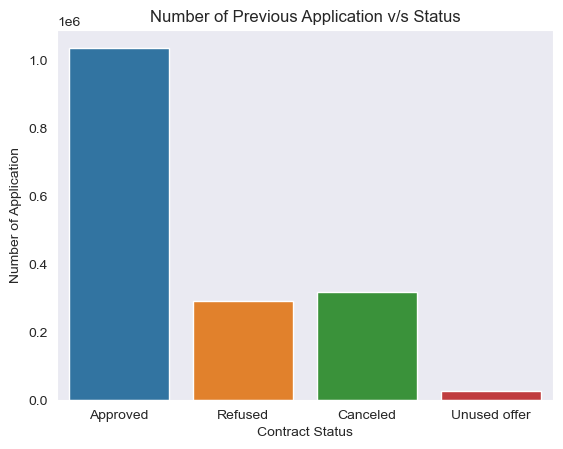

In [111]:
#Plotting the countplot to understand the count for different contract status
sns.countplot(data= new_df_pre, x= 'NAME_CONTRACT_STATUS')
plt.title('Number of Previous Application v/s Status')
plt.xlabel('Contract Status')
plt.ylabel('Number of Application')
plt.show()

### Infernece:

1. Based on the above visual, we can say that most of the previous applications were approved.
2. Very less number of previous application were unused. 

###  2.4.2: Analysing the Payment type of the previous applicants 

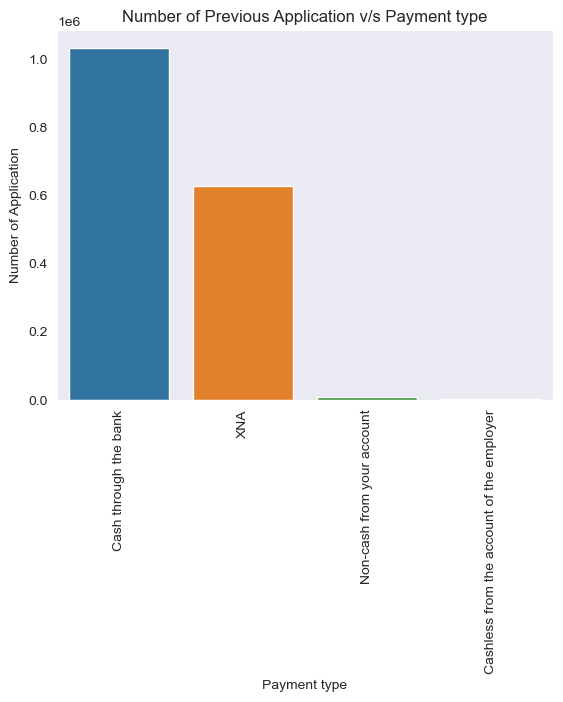

In [112]:
#Plotting the countplot to understand the count of different payment type
sns.countplot(data= new_df_pre, x= 'NAME_PAYMENT_TYPE')
plt.title('Number of Previous Application v/s Payment type')
plt.xlabel('Payment type')
plt.ylabel('Number of Application')
plt.xticks(rotation=90)
plt.show()

### Inference: 

1. Based on the above visuals, we can interpret that most of the payment done for the previous application is by Cash through the bank. 
2. We do see some XNA values, however, we wont impute any values for the same as the values is high and cannot be sure which mode of payement(payment type) to choose. 

### 2.4.3: Analysing the Contract type of the previous applicants 

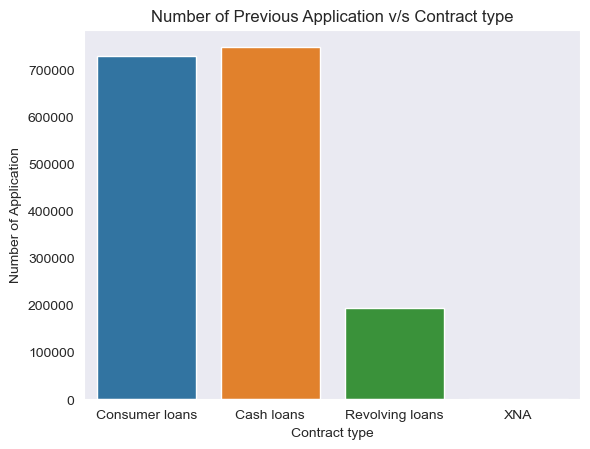

In [113]:
#Plotting the countplot to understand the count of different type of contracts
sns.countplot(data= new_df_pre, x= 'NAME_CONTRACT_TYPE')
plt.title('Number of Previous Application v/s Contract type')
plt.xlabel('Contract type')
plt.ylabel('Number of Application')
plt.show()

### Inference:

Based on the above visual, we can say that most of the loans applied previously are Cash loans followed by Consumer loans and Revolving loans

### 2.4.4: Analysing the Client type of the previous applicants 

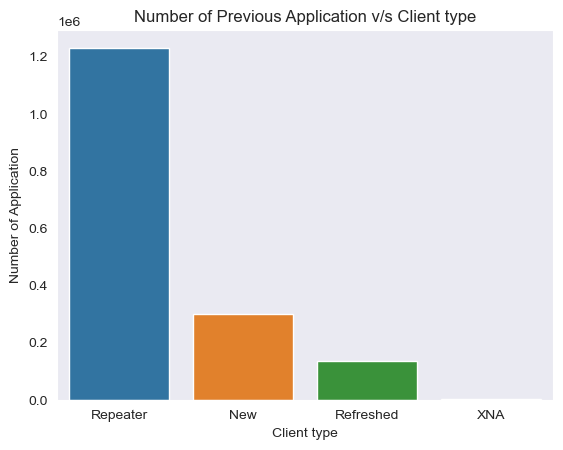

In [114]:
#Plotting the countplot to understand the count of different type of clients
sns.countplot(data= new_df_pre, x= 'NAME_CLIENT_TYPE')
plt.title('Number of Previous Application v/s Client type')
plt.xlabel('Client type')
plt.ylabel('Number of Application')
plt.show()

### Inference:

Based on the visual, we can say that most of the applicant in the previous application is Repeater

## 2.5: Bivariate Analysis 

### 2.5.1: Analysing NAME_CONTRACT_STATUS v/s NAME_CLIENT_TYPE

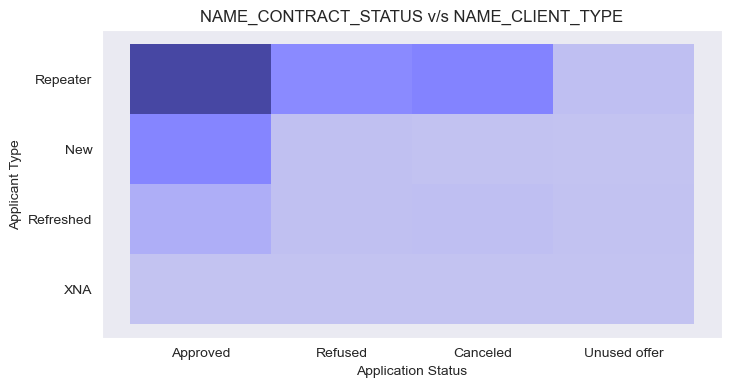

In [115]:
#Plotting the NAME_CONTRACT_STATUS v/s NAME_CLIENT_TYPE
plt.figure(figsize=[8,4])
plt.title("NAME_CONTRACT_STATUS v/s NAME_CLIENT_TYPE")
sns.histplot(x='NAME_CONTRACT_STATUS', y='NAME_CLIENT_TYPE', data=new_df_pre, color='Blue')
plt.xlabel('Application Status')
plt.ylabel('Applicant Type')
plt.show()

### Inference:

Based on the above visual, we can say that for Repeater Applicants most of the loan application are approved.  

### 2.5.2: Analysing NAME_CONTRACT_STATUS v/s NAME_CONTRACT_TYPE 

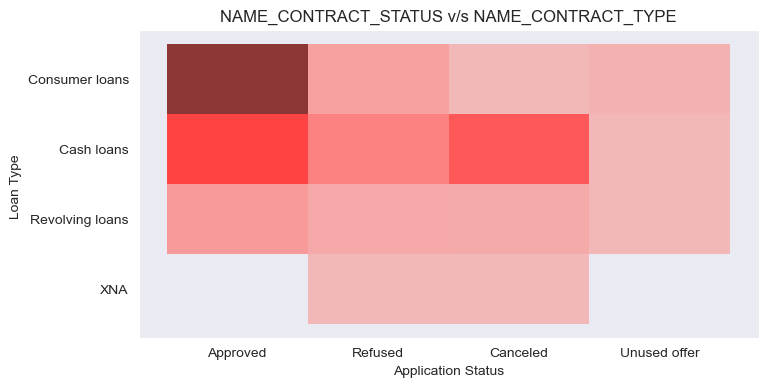

In [116]:
#Plotting the NAME_CONTRACT_STATUS v/s NAME_CONTRACT_TYPE
plt.figure(figsize=[8,4])
plt.title("NAME_CONTRACT_STATUS v/s NAME_CONTRACT_TYPE")
sns.histplot(x='NAME_CONTRACT_STATUS', y='NAME_CONTRACT_TYPE', data=new_df_pre, color='Red')
plt.xlabel('Application Status')
plt.ylabel('Loan Type ')
plt.show()

### Inference:

1. Based on the above visual, we can say that Consumer loan got the highest approval among all the type of loans
2. Cash loan also got good amount of Approval and also some less than approval got cancelled 

## 3: MERGING THE DATA AS COMBINED_DF 

In [117]:
#Before we merge the datasets checking the shape of the repective dataset
new_df_pre.shape # for previous application dataset

(1670214, 26)

In [118]:
new_df_app.shape # for application dataset

(307511, 47)

In [119]:
#Merging the two dataset as combined_df
combined_df=new_df_app.merge(new_df_pre,on='SK_ID_CURR',how='inner')

In [120]:
#Displaying the head of the combined dataframe
combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EMPLOYMENT_IN_YEARS,REGISTRATION_IN_YEARS,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_RANGE,AMT_INCOME_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0,3.0,18-30,200000-220000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,2.0,40-50,250000-270000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,2.0,40-50,250000-270000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,2.0,40-50,250000-270000,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0,2.0,50-60,50000-70000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


## 3.1: DATA INSPECTION 

In [121]:
#Checking the shape of the data
combined_df.shape

(1413701, 72)

In [122]:
#Checking the size of the data for understanding the number of records in the dataset
combined_df.size

101786472

In [123]:
#Checking for if any null value in the combined dataset
combined_df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START_x    0
HOUR_APPR_PROCESS_START_x       0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_T

##### As we see from above that there is no null value in the combined dataframe hence, we can no move forward with or analysis.  

## 3.2: UNIVARIATE ANALYSIS 

### 3.2.1: Analysing the type of client with respect to defaulter/Non-Defaulter 

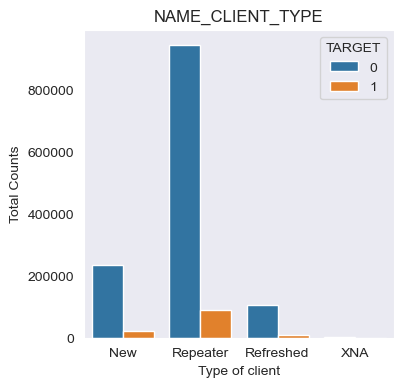

In [124]:
#Plotting to analyse the type of client with respect to defaulter/Non-Defaulter
plt.figure(figsize=[4,4])
plt.title('NAME_CLIENT_TYPE')
sns.countplot(data= combined_df , x='NAME_CLIENT_TYPE', hue='TARGET')
plt.ylabel('Total Counts')
plt.xlabel('Type of client')
plt.show()

### Inference:

Based on the above plot we can say that Repeater are the most number of client and most of them are non-defaulters

### 3.2.2: Analysing the type of Contract/loan with respect to defaulter/Non-Defaulter 

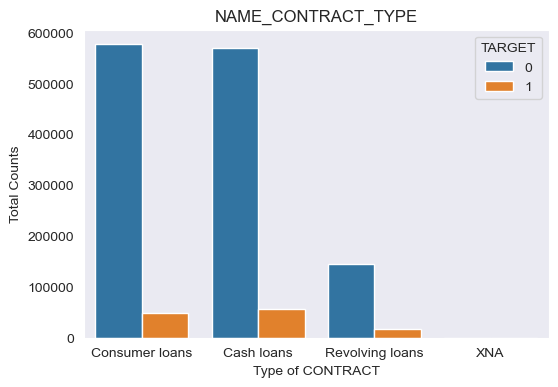

In [125]:
# Plotting to analyse the type of Contract/loan with respect to defaulter/Non-Defaulter 
plt.figure(figsize=[6,4])
plt.title('NAME_CONTRACT_TYPE')
sns.countplot(data= combined_df , x='NAME_CONTRACT_TYPE_y', hue='TARGET')
plt.ylabel('Total Counts')
plt.xlabel('Type of CONTRACT')
plt.show()

### Inference:

1. Based on the above graph, we can say that counsumer loan and cash loan are the one more opted for and most the non-defaulter are from consumer loan followed by cash loan.
2. Secondly, we can see that number of deafulter is higher in cash loan

### 3.2.3: Analysing the type of Contract/loan Status with respect to defaulter/Non-Defaulter  

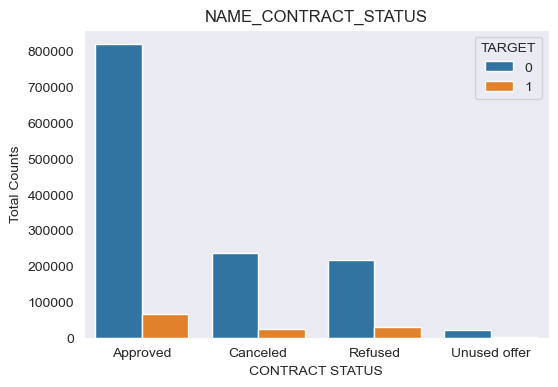

In [126]:
#Plotting to analysing the type of Contract/loan status with respect to defaulter/Non-Defaulter 
plt.figure(figsize=[6,4])
plt.title('NAME_CONTRACT_STATUS')
sns.countplot(data= combined_df , x='NAME_CONTRACT_STATUS', hue='TARGET')
plt.ylabel('Total Counts')
plt.xlabel('CONTRACT STATUS')
plt.show()

## 3.3: BIVARIATE ANALYSIS 

### 3.3.1: Analysing the Contract/loan status with the occupation type

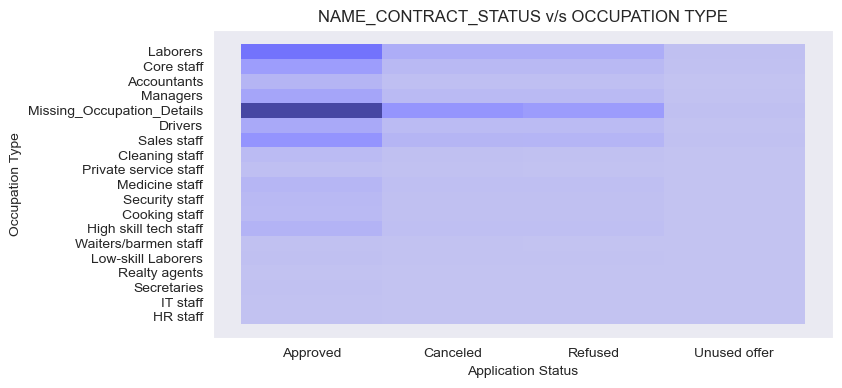

In [127]:
#Plotting to analyse Contract/loan status with occupation type
plt.figure(figsize=[8,4])
plt.title("NAME_CONTRACT_STATUS v/s OCCUPATION TYPE")
sns.histplot(x='NAME_CONTRACT_STATUS', y='OCCUPATION_TYPE', data=combined_df, color='Blue')
plt.xlabel('Application Status')
plt.ylabel('Occupation Type')
plt.show()

### Inference:

From the graph we can interpret that after the 'missing occupation details' occupation category laborers are the one whose application are most approved.

### 3.3.2: Analysing the Contract/loan status with the Application rejection reason

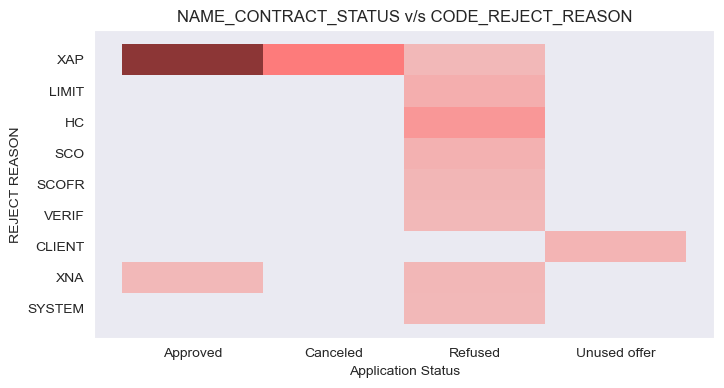

In [128]:
#Plotting to analyse the Contract/loan status with Application rejection reason 
plt.figure(figsize=[8,4])
plt.title("NAME_CONTRACT_STATUS v/s CODE_REJECT_REASON")
sns.histplot(x='NAME_CONTRACT_STATUS', y='CODE_REJECT_REASON', data=combined_df, color='Red')
plt.xlabel('Application Status')
plt.ylabel('REJECT REASON')
plt.show()

### Inference:

From the graph, we can interpret that most the loan application was refused because of the reason being 'HC' 

## 3.4: MULTIVARIATE ANALYSIS 

In [129]:
combined_df_corr = combined_df[['AMT_GOODS_PRICE_x','AMT_CREDIT_x','AMT_INCOME_TOTAL','CNT_CHILDREN','AMT_ANNUITY_x','CNT_FAM_MEMBERS','AGE_IN_YEARS','AMT_CREDIT_y','AMT_GOODS_PRICE_y','EMPLOYMENT_IN_YEARS']].corr()
combined_df_corr

,AMT_GOODS_PRICE_x,AMT_CREDIT_x,AMT_INCOME_TOTAL,CNT_CHILDREN,AMT_ANNUITY_x,CNT_FAM_MEMBERS,AGE_IN_YEARS,AMT_CREDIT_y,AMT_GOODS_PRICE_y,EMPLOYMENT_IN_YEARS
AMT_GOODS_PRICE_x,1.000000,0.986029,0.167767,-0.001233,0.762273,0.061249,0.046322,0.117004,0.123173,-0.055960
AMT_CREDIT_x,0.986029,1.000000,0.166257,0.002784,0.758418,0.063287,0.047638,0.116746,0.122231,-0.058828
AMT_INCOME_TOTAL,0.167767,0.166257,1.000000,0.011661,0.206289,0.014119,-0.025687,0.070651,0.079582,-0.067043
CNT_CHILDREN,-0.001233,0.002784,0.011661,1.000000,0.029302,0.879224,-0.362933,-0.034861,-0.045578,-0.249910
AMT_ANNUITY_x,0.762273,0.758418,0.206289,0.029302,1.000000,0.084363,-0.028967,0.107644,0.118411,-0.108202
CNT_FAM_MEMBERS,0.061249,0.063287,0.014119,0.879224,0.084363,1.000000,-0.326127,-0.005233,-0.013264,-0.250511
AGE_IN_YEARS,0.046322,0.047638,-0.025687,-0.362933,-0.028967,-0.326127,1.000000,0.078018,0.098658,0.632239
AMT_CREDIT_y,0.117004,0.116746,0.070651,-0.034861,0.107644,-0.005233,0.078018,1.000000,0.939147,0.005044
AMT_GOODS_PRICE_y,0.123173,0.122231,0.079582,-0.045578,0.118411,-0.013264,0.098658,0.939147,1.000000,0.018974
EMPLOYMENT_IN_YEARS,-0.055960,-0.058828,-0.067043,-0.249910,-0.108202,-0.250511,0.632239,0.005044,0.018974,1.000000


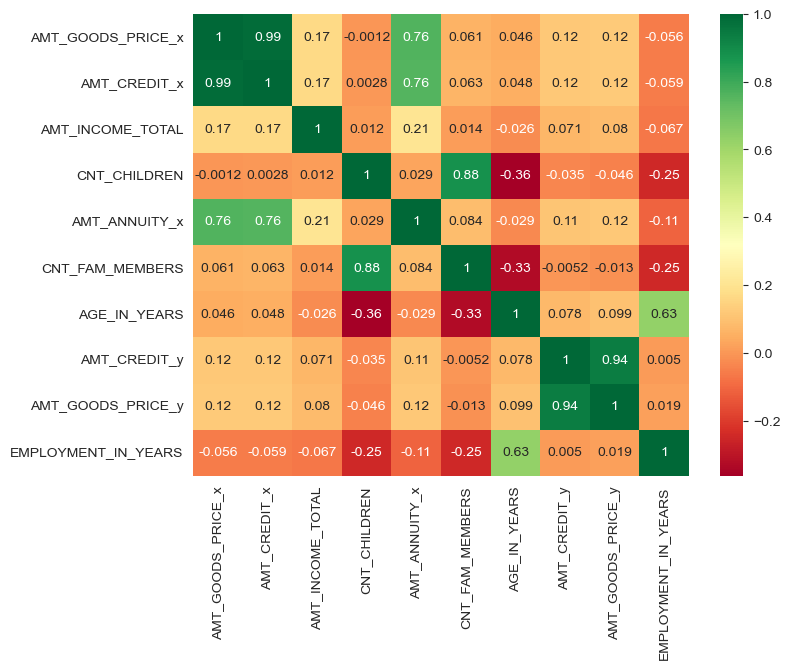

In [130]:
#Plotting a heatmap of the above correlation to have visual insights
plt.figure(figsize=[8,6])
sns.heatmap(combined_df_corr, cmap='RdYlGn', annot=True)
plt.show()

## Inference:

1. Based on the above visual we can interpret, that loan amount taken('AMT_CREDIT_X','AMT_CREDIT_Y') are both highly correlated with the goods price against which the loan was taken ('AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y).
2. Followed by, We can also interpret that the 'CNT_FAM_MEMBERS' has a good correlation with 'CNT_CHILDREN'.
3. Followed by, we can see that  'AMT_ANNUITY' is highly correlated with 'AMT_GOODS_PRICE' and 'AMT_CREDIT', as more/less the amount taken for credit more/less is the amount innuity.
4. Followed by, we can say that the 'AGE_IN_YEARS' is also good correlated with the 'EMPLOYMENT_IN_YEARS' column.